# Reusing the code from Exploration Phase. The code and comments will be updated as proceeded. The code and comments might not be perfect until finalized


# What is: Kaiser-Meyer-Olkin measure of sampling adequacy:


In [1]:
# Old-comment: PCA section, Correlation, Heatmaps, and then Bivariate plots can be seen to be important
# Might have to adjust/improve my conclusions from the plots in future work

In [2]:
# Target variable ACR i.e. Albumin Creatinine Ratio

# Tried the following Target variables that might not even be present now. Thopugh might include if seem to be important

# ESRD patients: Avg. Annual Mortality rates is given the most importance
# One another target variable is: ESRD patients: Total (or %) deaths for target year
# Other target variables: Dialysis patients: Total (or %) deaths for target year

In [1]:
# For plotting, import libraries
from matplotlib import pyplot as plt
import matplotlib

# import seaborn as sns
%matplotlib inline
import pandas as pd


import numpy as np

from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns


In [5]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)


In [3]:
import os

data_folder = './acr-data-for-analysis/food-groups/'
data_files = os.listdir(data_folder)
data_files

['consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx',
 'merged.csv',
 'merged.xlsx',
 'merged_individual_foods_and_nutrients.xlsx',
 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'more-columns-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'nutrients_albumin_creatinine_and_demographics_nutrients.xlsx',
 'recom_amount_by_participants.csv',
 'usda_food_groups.csv',
 'usda_food_groups.xlsx']

In [4]:
data_file = data_folder + 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx'
excel_file = pd.ExcelFile(data_file)

In [8]:
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names[:4]

foodgroup_acr_data_df = excel_file.parse('Sheet1')
foodgroup_acr_data_df.head(5)

participant_id  participant_age  gender                  food_group_name  \
0           85287               69       1                       Vegetables   
1           86548               69       1                           Fruits   
2           93587               29       1                           Fruits   
3           86993               15       2  Fats, oils, and salad dressings   
4           84865               26       1                       Vegetables   

   avg_food_weight_in_gms  age_from_recom_amount  \
0                  160.08                     69   
1                   83.38                     69   
2                  155.00                     29   
3                    3.15                     15   
4                  328.38                     26   

      food_group_from_recom_amount  avg_taken_from_recom_amount  \
0                       Vegetables                        277.5   
1                           fruits                        180.0   
2                           fruits                        135.0   
3  Fats, oils, and salad dressings                         21.0   
4                       Vegetables                        232.5   

   recommended_low  recommended_high      acr  kidney_failed  \
0            337.5             487.5  2254.05            1.0   
1            262.5             337.5    24.20            2.0   
2            262.5             337.5    28.32            2.0   
3             25.5              40.5    15.20            NaN   
4            412.5             525.0     3.60            2.0   

   systolic_pressure  diastolic_pressure  calorie  protein  sodium  \
0              204.0                90.0    177.0    13.30   706.0   
1              132.0                74.0     90.0     1.10     1.0   
2              124.0                68.0     79.0     0.17     8.0   
3              110.0                56.0     23.0     0.02    18.0   
4              118.0                58.0    199.0     4.85   134.0   

   carbohydrate  sugar  fibre   fat  saturated_fat  mono_fat  poly_fat  \
0         27.95  12.79    2.7  6.08          1.288     1.708     2.527   
1         23.07  15.48    3.6  0.33          0.113     0.032     0.076   
2         20.34  19.30    0.5  0.09          0.022     0.034     0.017   
3          0.09   0.00    0.0  2.46          1.428     0.625     0.105   
4         40.34  24.40    3.6  9.39          1.489     3.805     3.441   

   cholesterol  calcium  phosphorous  magnesium  potassium  alcohol  \
0          5.0    154.0        245.0       72.0      553.0      0.0   
1          0.0     26.0         23.0       27.0      362.0      0.0   
2          0.0     26.0          3.0        5.0       37.0      0.0   
3          7.0      1.0          1.0        0.0        1.0      0.0   
4          0.0     48.0         87.0       45.0      689.0      0.0   

                 m_food_group_name  a_sample_food_code  \
0                       Vegetables            78101110   
1                           Fruits            63107010   
2                           Fruits            64204010   
3  Fats, oils, and salad dressings            81101010   
4                       Vegetables            74602200   

                                       a_sample_food  \
0         Potato, mashed, from fast food, with gravy   
1                                        Orange, raw   
2                                       Mango nectar   
3                       Butter, whipped, tub, salted   
4  Tomato soup, canned, reduced sodium, prepared ...   

               a_sample_food_name  food_group_id  albumin_urine_mu_g  \
0  POTATO, MASHED, FROM FAST FOOD              1              4170.0   
1                     ORANGE, RAW              7                27.1   
2                    MANGO NECTAR              7                30.3   
3    BUTTER, WHIPPED, TUB, SALTED             17                15.5   
4  TOMATO SOUP, CANNED, REDUCED S              1                 6.3   

   albumin_urin

In [9]:
foodgroup_acr_data_df.describe()

participant_id  participant_age        gender  avg_food_weight_in_gms  \
count    45419.000000     45419.000000  45419.000000            45419.000000   
mean     88752.681411        36.587287      1.518550              161.791645   
std       2869.348825        23.796881      0.499661              212.006694   
min      83732.000000         3.000000      1.000000                0.200000   
25%      86263.000000        14.000000      1.000000               58.750000   
50%      88783.000000        34.000000      2.000000              110.880000   
75%      91223.000000        57.000000      2.000000              191.625000   
max      93702.000000        80.000000      2.000000             6720.000000   

       age_from_recom_amount  avg_taken_from_recom_amount  recommended_low  \
count           45419.000000                 45419.000000     45419.000000   
mean               36.587287                   399.481693       418.068617   
std                23.796881                   363.536249       311.211597   
min                 3.000000                    10.500000        15.000000   
25%                14.000000                   105.000000       150.000000   
50%                34.000000                   240.000000       412.500000   
75%                57.000000                   817.500000       787.500000   
max                80.000000                  1072.500000      1050.000000   

       recommended_high           acr  kidney_failed  systolic_pressure  \
count      45419.000000  44055.000000   29742.000000       38853.000000   
mean         553.304608     44.440649       1.965873         120.803284   
std          423.758031    363.051667       0.320361          18.664920   
min           16.500000      0.220000       1.000000          72.000000   
25%          225.000000      5.210000       2.000000         108.000000   
50%          465.000000      8.220000       2.000000         118.000000   
75%          975.000000     15.950000       2.000000         130.000000   
max         1350.000000  21152.170000       9.000000         236.000000   

       diastolic_pressure       calorie       protein        sodium  \
count        38853.000000  45419.000000  45419.000000  45419.000000   
mean            66.158289    270.619365     11.334877    477.117143   
std             14.145235    271.216517     16.493533    646.142403   
min              0.000000      0.000000      0.000000      0.000000   
25%             58.000000     95.000000      0.800000     41.000000   
50%             66.000000    187.000000      4.960000    236.000000   
75%             74.000000    367.000000     14.905000    671.000000   
max            120.000000   4100.000000    247.640000   8868.000000   

       carbohydrate         sugar         fibre           fat  saturated_fat  \
count  45419.000000  45419.000000  45419.000000  45419.000000   45419.000000   
mean      32.032490     15.403211      2.435520     12.207437       4.237338   
std       33.226583     20.465090      3.500755     15.300007       5.970220   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        8.270000      2.260000      0.000000      0.930000       0.142000   
50%       25.110000      9.020000      1.200000      7.180000       2.200000   
75%       44.980000     21.000000      3.500000     17.700000       5.762500   
max      876.960000    609.250000     60.600000    267.280000     117.853000   

           mono_fat      poly_fat   cholesterol       calcium   phosphorous  \
count  45419.000000  45419.000000  45419.000000  45419.000000  45419.000000   
mean       4.361333      2.942117     49.208471    140.093822    186.893375   
std        5.901821      4.405742    104.791004    198.390236    222.119759   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.134000      0.120000      0.000000     18.000000     27.000000   
50%        2.266000      1.136500      7.000000     60.000000    118.000

In [10]:
foodgroup_acr_data_df.columns

Index(['participant_id', 'participant_age', 'gender', 'food_group_name',
       'avg_food_weight_in_gms', 'age_from_recom_amount',
       'food_group_from_recom_amount', 'avg_taken_from_recom_amount',
       'recommended_low', 'recommended_high', 'acr', 'kidney_failed',
       'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
       'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
       'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
       'magnesium', 'potassium', 'alcohol', 'm_food_group_name',
       'a_sample_food_code', 'a_sample_food', 'a_sample_food_name',
       'food_group_id', 'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_freque

# PCA: Apply PCA to find important features

In [ ]:
# from the dataset above: move food group name from rows to columns

Pivoting

Only food group intake data

In [11]:
folder = 'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' 
#/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'

os.listdir(folder)

df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

#df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

avg_food_weight_in_gms                                  \
food_group_name                  Dairy Fats, oils, and salad dressings   
participant_id                                                           
83732                           245.47                           21.31   
83733                              NaN                           14.19   
83734                           266.92                           16.89   
83735                            15.50                             NaN   
83736                              NaN                           28.38   

                                                                       \
food_group_name  Fruits  Grains Protein Sugars, sweets, and beverages   
participant_id                                                          
83732            197.00  102.15  154.58                        357.50   
83733               NaN  201.73  272.00                        889.16   
83734            350.33   79.50  117.60                        430.50   
83735               NaN   55.15  242.00                        160.33   
83736             84.83  158.00   64.50                        237.56   

                            
food_group_name Vegetables  
participant_id              
83732                68.38  
83733                94.84  
83734               126.27  
83735                89.30  
83736                 6.00

# all other columns by each participant
#mean does not have effect because all rows are the same for a participant for these columns

In [13]:
#foodgroup_acr_data_df.columns
# columns such as avg_taken_from_recom_amount	recommended_low	recommended_high also need pivoting otherwise the averaged value does not make sense
# not doing analysis on them for noe

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'food_group_id', 'avg_food_weight_in_gms', 'avg_taken_from_recom_amount', 'recommended_low', 'recommended_high'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()
df_without_food_groups_one_entry.head()

participant_age  gender  age_from_recom_amount     acr  \
participant_id                                                           
83732                      62.0     1.0                   62.0    6.10   
83733                      53.0     1.0                   53.0   12.82   
83734                      78.0     1.0                   78.0  150.00   
83735                      56.0     2.0                   56.0    5.69   
83736                      42.0     2.0                   42.0   15.11   

                kidney_failed  systolic_pressure  diastolic_pressure  \
participant_id                                                         
83732                     2.0              128.0                70.0   
83733                     2.0              146.0                88.0   
83734                     1.0              138.0                46.0   
83735                     2.0              132.0                72.0   
83736                     2.0              100.0                70.0   

                   calorie    protein      sodium  carbohydrate      sugar  \
participant_id                                                               
83732           293.142857  12.738571  586.571429     33.197143  15.197143   
83733           775.300000  21.409000  843.300000     74.188000  35.189000   
83734           338.142857  14.153571  522.333333     44.706429  16.815714   
83735           215.400000  13.308000  423.600000     23.758000   7.176000   
83736           149.166667   3.920000  254.000000     17.648333   8.091667   

                   fibre        fat  saturated_fat  mono_fat  poly_fat  \
participant_id                                                           
83732           3.042857  15.041429       5.569214  5.508571  2.997571   
83733           1.720000  29.830000       8.580300  9.324900  7.989300   
83734           5.328571  12.953571       5.459071  4.216571  3.764357   
83735           2.560000   8.626000       3.057600  3.341600  1.587200   
83736           0.550000   7.255000       3.211167  2.429667  0.805667   

                cholesterol     calcium  phosphorous  magnesium   potassium  \
participant_id                                                                
83732             75.857143  170.285714   192.571429  36.857143  443.571429   
83733            143.800000  111.000000   418.800000  64.900000  599.200000   
83734             70.000000  183.523810   205.000000  66.571429  597.000000   
83735             27.400000  243.800000   258.000000  52.800000  395.200000   
83736             26.166667   19.166667    53.916667   9.333333   99.250000   

                alcohol  a_sample_food_code  albumin_urine_mu_g  \
participant_id                                                    
83732              0.00        5.910781e+07                 2.5   
83733             18.97        6.592856e+07                23.2   
83734              0.00        5.919755e+07               105.0   
83735              0.00        5.269247e+07                 5.8   
83736              0.00        6.522404e+07                47.6   

                albumin_urine_mg  creatinine_mu_mol  creatinine_mg  \
participant_id                                                       
83732                        2.5             3624.4           41.0   
83733                       23.2            16000.4          181.0   
83734                      105.0             6188.0           70.0   
83735                        5.8             9016.8          102.0   
83736                       47.6            27846.0          315.0   

                received_dialysis_in_12_months  kidney_stones  \
participant_id                                                  
83732                                      NaN            2.0   
83733                                      NaN            1.0   
83734                                      2.0            2.0   
83735                                      NaN            2.0   
83736                

In [15]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape
merged.head()
#merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')

(avg_food_weight_in_gms, Dairy)  \
participant_id                                    
83732                                    245.47   
83733                                       NaN   
83734                                    266.92   
83735                                     15.50   
83736                                       NaN   

                (avg_food_weight_in_gms, Fats, oils, and salad dressings)  \
participant_id                                                              
83732                                                       21.31           
83733                                                       14.19           
83734                                                       16.89           
83735                                                         NaN           
83736                                                       28.38           

                (avg_food_weight_in_gms, Fruits)  \
participant_id                                     
83732                                     197.00   
83733                                        NaN   
83734                                     350.33   
83735                                        NaN   
83736                                      84.83   

                (avg_food_weight_in_gms, Grains)  \
participant_id                                     
83732                                     102.15   
83733                                     201.73   
83734                                      79.50   
83735                                      55.15   
83736                                     158.00   

                (avg_food_weight_in_gms, Protein)  \
participant_id                                      
83732                                      154.58   
83733                                      272.00   
83734                                      117.60   
83735                                      242.00   
83736                                       64.50   

                (avg_food_weight_in_gms, Sugars, sweets, and beverages)  \
participant_id                                                            
83732                                                      357.50         
83733                                                      889.16         
83734                                                      430.50         
83735                                                      160.33         
83736                                                      237.56         

                (avg_food_weight_in_gms, Vegetables)  participant_age  gender  \
participant_id                                                                  
83732                                          68.38             62.0     1.0   
83733                                          94.84             53.0     1.0   
83734                                         126.27             78.0     1.0   
83735                                          89.30             56.0     2.0   
83736                                           6.00             42.0     2.0   

                age_from_recom_amount     acr  kidney_failed  \
participant_id                                                 
83732                            62.0    6.10            2.0   
83733                            53.0   12.82            2.0   
83734                            78.0  150.00            1.0   
83735                            56.0    5.69            2.0   
83736                            42.0   15.11            2.0   

                systolic_pressure  diastolic_pressure     calorie    protein  \
participant_id                                                                 
83732                       128.0                70.0  293.142857  12.738571   
83733                       146.0                88.0  775.300000  21.409000   
83734                       138.0                46.0  338.142857  14.153571   
83735                       132.0                72.0  215.400000  13.308

In [16]:
# adjust column names

column_dict = {}
for aName in merged.columns:    
    try:        
        if 'avg_food_weight_in_gms' in aName:            
            column_dict[aName] = aName[1] 
        else:
            column_dict[aName] = aName
        
    except:
        print(aName)
        continue

# column_dict

In [17]:
merged = merged.rename(index=str, columns=column_dict)
merged.head()

Dairy  Fats, oils, and salad dressings  Fruits  Grains  \
participant_id                                                            
83732           245.47                            21.31  197.00  102.15   
83733              NaN                            14.19     NaN  201.73   
83734           266.92                            16.89  350.33   79.50   
83735            15.50                              NaN     NaN   55.15   
83736              NaN                            28.38   84.83  158.00   

                Protein  Sugars, sweets, and beverages  Vegetables  \
participant_id                                                       
83732            154.58                         357.50       68.38   
83733            272.00                         889.16       94.84   
83734            117.60                         430.50      126.27   
83735            242.00                         160.33       89.30   
83736             64.50                         237.56        6.00   

                participant_age  gender  age_from_recom_amount     acr  \
participant_id                                                           
83732                      62.0     1.0                   62.0    6.10   
83733                      53.0     1.0                   53.0   12.82   
83734                      78.0     1.0                   78.0  150.00   
83735                      56.0     2.0                   56.0    5.69   
83736                      42.0     2.0                   42.0   15.11   

                kidney_failed  systolic_pressure  diastolic_pressure  \
participant_id                                                         
83732                     2.0              128.0                70.0   
83733                     2.0              146.0                88.0   
83734                     1.0              138.0                46.0   
83735                     2.0              132.0                72.0   
83736                     2.0              100.0                70.0   

                   calorie    protein      sodium  carbohydrate      sugar  \
participant_id                                                               
83732           293.142857  12.738571  586.571429     33.197143  15.197143   
83733           775.300000  21.409000  843.300000     74.188000  35.189000   
83734           338.142857  14.153571  522.333333     44.706429  16.815714   
83735           215.400000  13.308000  423.600000     23.758000   7.176000   
83736           149.166667   3.920000  254.000000     17.648333   8.091667   

                   fibre        fat  saturated_fat  mono_fat  poly_fat  \
participant_id                                                           
83732           3.042857  15.041429       5.569214  5.508571  2.997571   
83733           1.720000  29.830000       8.580300  9.324900  7.989300   
83734           5.328571  12.953571       5.459071  4.216571  3.764357   
83735           2.560000   8.626000       3.057600  3.341600  1.587200   
83736           0.550000   7.255000       3.211167  2.429667  0.805667   

                cholesterol     calcium  phosphorous  magnesium   potassium  \
participant_id                                                                
83732             75.857143  170.285714   192.571429  36.857143  443.571429   
83733            143.800000  111.000000   418.800000  64.900000  599.200000   
83734             70.000000  183.523810   205.000000  66.571429  597.000000   
83735             27.400000  243.800000   258.000000  52.800000  395.200000   
83736             26.166667   19.166667    53.916667   9.333333   99.250000   

                alcohol  a_sample_food_code  albumin_urine_mu_g  \
participant_id                                                    
83732              0.00        5.910781e+07                 2.5   
83733             18.97        6.592856e+07                23.2   
83734              0.00        5.919755e+07               105.0   
83735              0.

In [18]:
merged.columns

Index(['Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'participant_age', 'gender', 'age_from_recom_amount', 'acr',
       'kidney_failed', 'systolic_pressure', 'diastolic_pressure', 'calorie',
       'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat',
       'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium',
       'phosphorous', 'magnesium', 'potassium', 'alcohol',
       'a_sample_food_code', 'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_frequent',
       'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       'how_much_leak_bothering', 'how_much_daily_a

In [19]:
# removing text features and/or not that important features
#foodgroup_acr_data_df

# replacing null values with zeros
# ideally mean value for each age group and food groupp for that colum will work better
df_drop_pca = merged #.drop([ 'food_group_from_recom_amount', 'm_food_group_name', 'a_sample_food', 'a_sample_food_name'], axis=1)
# 'participant_age', 'gender',
df_drop_pca.fillna(0, inplace=True)
df_drop_pca.head(10)

Dairy  Fats, oils, and salad dressings  Fruits  Grains  \
participant_id                                                            
83732           245.47                            21.31  197.00  102.15   
83733             0.00                            14.19    0.00  201.73   
83734           266.92                            16.89  350.33   79.50   
83735            15.50                             0.00    0.00   55.15   
83736             0.00                            28.38   84.83  158.00   
83737           132.50                             5.21   76.00   74.67   
83738            94.38                             0.00  226.00  112.89   
83739           106.75                            11.04   84.64   41.17   
83741           152.25                             4.90  356.50  160.49   
83742           136.86                             0.00  232.88   92.44   

                Protein  Sugars, sweets, and beverages  Vegetables  \
participant_id                                                       
83732            154.58                         357.50       68.38   
83733            272.00                         889.16       94.84   
83734            117.60                         430.50      126.27   
83735            242.00                         160.33       89.30   
83736             64.50                         237.56        6.00   
83737            116.33                         221.62      197.50   
83738            239.00                         247.50       21.66   
83739             55.40                         166.25       56.00   
83741            260.00                         289.33      157.25   
83742             73.28                         185.73      294.75   

                participant_age  gender  age_from_recom_amount     acr  \
participant_id                                                           
83732                      62.0     1.0                   62.0    6.10   
83733                      53.0     1.0                   53.0   12.82   
83734                      78.0     1.0                   78.0  150.00   
83735                      56.0     2.0                   56.0    5.69   
83736                      42.0     2.0                   42.0   15.11   
83737                      72.0     2.0                   72.0   16.25   
83738                      11.0     2.0                   11.0    7.40   
83739                       4.0     1.0                    4.0    8.00   
83741                      22.0     1.0                   22.0    5.20   
83742                      32.0     2.0                   32.0    5.33   

                kidney_failed  systolic_pressure  diastolic_pressure  \
participant_id                                                         
83732                     2.0              128.0                70.0   
83733                     2.0              146.0                88.0   
83734                     1.0              138.0                46.0   
83735                     2.0              132.0                72.0   
83736                     2.0              100.0                70.0   
83737                     2.0              116.0                58.0   
83738                     0.0              102.0                36.0   
83739                     0.0                0.0                 0.0   
83741                     2.0              110.0                70.0   
83742                     2.0              120.0                70.0   

                   calorie    protein      sodium  carbohydrate      sugar  \
participant_id                                                               
83732           293.142857  12.738571  586.571429     33.197143  15.197143   
83733           775.300000  21.409000  843.300000     74.188000  35.189000   
83734           338.142857  14.153571  522.333333     44.706429  16.815714   
83735           215.400000  13.308000  423.600000     23.758000   7.176000   
83736           149.166667   3.920000  254.000000    

In [20]:
# save merged data
merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')
merged.to_csv(data_folder + 'food_group_data_ready_for_excel_regression.csv')

# Merge with nutrients file 

In [21]:
nutrient_file = data_folder + 'nutrients_albumin_creatinine_and_demographics_nutrients.xlsx'
nutrient_file = pd.ExcelFile(nutrient_file)

# see all sheet names
sheet_names = nutrient_file.sheet_names
sheet_names[:4]

nutrient_acr_data_df = nutrient_file.parse('Sheet1')
nutrient_acr_data_df.head(5)
#merged.head(5)


participant_id  participant_age    acr  kidney_failed  systolic_pressure  \
0           83747               46  38.92            2.0              144.0   
1           83748                3   6.43            NaN                NaN   
2           83749               17   4.60            NaN              116.0   
3           83750               45   6.17            2.0              116.0   
4           83751               16   6.92            NaN              104.0   

   diastolic_pressure  gender  avg_energy_kcal  avg_protein_gm  \
0                94.0       1           1528.5          79.215   
1                 NaN       1           2182.5          88.325   
2                56.0       2           1683.0          65.740   
3                70.0       1           3983.0         125.180   
4                52.0       2            979.0          21.520   

   avg_carbohydrate_gm  avg_total_sugars  avg_dietary_fiber_gm  \
0              149.395            94.585                  5.70   
1              288.225           203.320                 10.05   
2              209.180           129.420                  6.30   
3              492.200           234.060                 19.50   
4              108.270            43.950                  9.60   

   avg_total_fat_gm  avg_total_saturated_fatty_acids_gm  \
0            44.885                             11.2870   
1            78.145                             34.2250   
2            66.505                             18.0095   
3           173.550                             47.5490   
4            51.730                             23.2980   

   avg_total_monounsaturated_fatty_acids_gm  \
0                                   15.3250   
1                                   23.9200   
2                                   23.0575   
3                                   66.6960   
4                                   19.6370   

   avg_total_polyunsaturated_fatty_acids_gm  avg_cholesterol_mg  \
0                                   11.6175               244.5   
1                                   12.7355               262.5   
2                                   19.4300               190.0   
3                                   41.8690               361.0   
4                                    4.6070                57.0   

   avg_vitamin_e_as_alpha_tocopherol_mg  \
0                                 5.415   
1                                 4.470   
2                                13.150   
3                                11.840   
4                                 3.050   

   avg_added_alpha_tocopherol_vitamin_E_mg  retinol_mcg  \
0                                     0.00         84.0   
1                                     0.20       1121.0   
2                                     6.55        285.0   
3                                     0.00        486.0   
4                                     0.00         72.0   

   avg_Vitamin_A_RAE_mcg  avg_Alpha_carotene_mcg  avg_beta_carotene_mcg  \
0                  104.5                    45.0                  190.5   
1                 1145.0                     5.5                  329.5   
2                  291.0                     8.5                   49.5   
3                  501.0                    30.0                  191.0   
4                   86.0                     4.0                  116.0   

   avg_beta_cryptoxanthin_mcg  avg_lycopene_mcg  avg_lutein_zeaxanthin_mcg  \
0                        91.5            2586.5                      183.5   
1                        23.0            1982.0                      310.5   
2                         3.0               0.0                      290.0   
3                         8.0             905.0                      167.0   
4                        92.0               0.0                      942.0   

   avg_thiamin_vitamin_B1_mg  avg_riboflavin_Vitamin_B2_mg  avg_Niacin_mg  \
0                     0.5915                        0.8665        26.6170   
1    

In [22]:
nutrient_acr_data_df.shape, type(merged), type(nutrient_acr_data_df)

((8608, 93), pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# food intake data and total nutrients intake data will be merged

though food intake data provides nutrients, however that belongs to that food item and/or food group. it does not say how much nutrients taken each day by the participants rather say how much nutrients in the food/food group the participant has taken

Hence, merging



In [28]:
# this code shows issues probably compatibility in data type
# rather I will take an easier option -- move the above merged data into DBMS and then will join with nutrients
# then will load all merged data

# merged_individual_foods_and_nutrients = merged.merge(nutrient_acr_data_df,  how='inner', left_on='participant_id', right_on='participant_id', left_index=False)
# merged_individual_foods_and_nutrients.head(5)

In [22]:
#merged_individual_foods_and_nutrients = merged_individual_foods_and_nutrients.xlsx
merged_individual_foods_and_nutrients_file = data_folder + 'merged_individual_foods_and_nutrients.xlsx'
merged_individual_foods_and_nutrients_excel = pd.ExcelFile(merged_individual_foods_and_nutrients_file)

# see all sheet names
sheet_names = merged_individual_foods_and_nutrients_excel.sheet_names
sheet_names[:4]

merged_individual_foods_and_nutrients_df = merged_individual_foods_and_nutrients_excel.parse('Sheet1')
merged_individual_foods_and_nutrients_df.head(5)
#merged_individual_foods_and_nutrients_df.head(5)

participant_id   Dairy  Fats, oils, and salad dressings  Fruits  Grains  \
0           83732  245.47                            21.31  197.00  102.15   
1           83733     NaN                            14.19     NaN  201.73   
2           83734  266.92                            16.89  350.33   79.50   
3           83735   15.50                              NaN     NaN   55.15   
4           83736     NaN                            28.38   84.83  158.00   

   Protein  Sugars, sweets, and beverages  Vegetables  participant_age  \
0   154.58                         357.50       68.38               62   
1   272.00                         889.16       94.84               53   
2   117.60                         430.50      126.27               78   
3   242.00                         160.33       89.30               56   
4    64.50                         237.56        6.00               42   

   gender  age_from_recom_amount  avg_taken_from_recom_amount  \
0       1                     62                   372.500000   
1       1                     53                   440.300000   
2       1                     78                   330.071429   
3       2                     56                   482.300000   
4       2                     42                   413.166667   

   recommended_low  recommended_high     acr  kidney_failed  \
0       388.071429        518.285714    6.10            2.0   
1       404.700000        566.200000   12.82            2.0   
2       388.071429        518.285714  150.00            1.0   
3       486.900000        652.600000    5.69            2.0   
4       425.250000        534.833333   15.11            2.0   

   systolic_pressure  diastolic_pressure     calorie   protein1      sodium  \
0              128.0                70.0  293.142857  12.738571  586.571429   
1              146.0                88.0  775.300000  21.409000  843.300000   
2              138.0                46.0  338.142857  14.153571  522.333333   
3              132.0                72.0  215.400000  13.308000  423.600000   
4              100.0                70.0  149.166667   3.920000  254.000000   

   carbohydrate      sugar     fibre        fat  saturated_fat  mono_fat  \
0     33.197143  15.197143  3.042857  15.041429       5.569214  5.508571   
1     74.188000  35.189000  1.720000  29.830000       8.580300  9.324900   
2     44.706429  16.815714  5.328571  12.953571       5.459071  4.216571   
3     23.758000   7.176000  2.560000   8.626000       3.057600  3.341600   
4     17.648333   8.091667  0.550000   7.255000       3.211167  2.429667   

   poly_fat  cholesterol     calcium  phosphorous  magnesium   potassium  \
0  2.997571    75.857143  170.285714   192.571429  36.857143  443.571429   
1  7.989300   143.800000  111.000000   418.800000  64.900000  599.200000   
2  3.764357    70.000000  183.523810   205.000000  66.571429  597.000000   
3  1.587200    27.400000  243.800000   258.000000  52.800000  395.200000   
4  0.805667    26.166667   19.166667    53.916667   9.333333   99.250000   

   alcohol  a_sample_food_code  albumin_urine_mu_g  albumin_urine_mg  \
0     0.00        5.910781e+07                 2.5               2.5   
1    18.97        6.592856e+07                23.2              23.2   
2     0.00        5.919755e+07               105.0             105.0   
3     0.00        5.269247e+07                 5.8               5.8   
4     0.00        6.522404e+07                47.6              47.6   

   creatinine_mu_mol  creatinine_mg  received_dialysis_in_12_months  \
0             3624.4           41.0                             NaN   
1            16000.4          181.0                             NaN   
2             6188.0           70.0                             2.0   
3             9016.8          102.0                             NaN   
4            27846.0          315.0                             NaN   

   kidney_stones  passed_kidney_stones_12_months  urinary_leakage_freq

In [23]:
# will rearrange columns
list(merged_individual_foods_and_nutrients_df.columns)

['participant_id',
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 'participant_age',
 'gender',
 'age_from_recom_amount',
 'avg_taken_from_recom_amount',
 'recommended_low',
 'recommended_high',
 'acr',
 'kidney_failed',
 'systolic_pressure',
 'diastolic_pressure',
 'calorie',
 'protein1',
 'sodium',
 'carbohydrate',
 'sugar',
 'fibre',
 'fat',
 'saturated_fat',
 'mono_fat',
 'poly_fat',
 'cholesterol',
 'calcium',
 'phosphorous',
 'magnesium',
 'potassium',
 'alcohol',
 'a_sample_food_code',
 'albumin_urine_mu_g',
 'albumin_urine_mg',
 'creatinine_mu_mol',
 'creatinine_mg',
 'received_dialysis_in_12_months',
 'kidney_stones',
 'passed_kidney_stones_12_months',
 'urinary_leakage_frequency',
 'urine_lose_each_time',
 'leak_during_activities',
 'how_frequent_leak_occurs',
 'urinated_before_reaching_toilet',
 'how_frequent',
 'leak_during_nonphysical_activities',
 'how_frequest_leak_nonphysical',
 'how_much

In [24]:
df_drop_pca = merged_individual_foods_and_nutrients_df[    
    [
        
'participant_id',
'gender',        
'participant_age',
'acr',   
'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
        
        
 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm',
        
 # these are amounts in foods not total/avg taken       
 'calorie',
 'protein1',
 'sodium',
 'carbohydrate',
 'sugar',
 'fibre',
 'fat',
 'saturated_fat',
 'mono_fat',
 'poly_fat',
 'cholesterol',
 'calcium',
 'phosphorous',
 'magnesium',
 'potassium',
 'alcohol',
 
  #no significance
 'a_sample_food_code',
        
        
 # these are known to be highly/directly affecting
 # will show highly affecting
 # food groups and/or nutrients are our focus
        
 'systolic_pressure',
 'diastolic_pressure', 
 'albumin_urine_mu_g',
 'albumin_urine_mg',
 'creatinine_mu_mol',
 'creatinine_mg',
 'received_dialysis_in_12_months',
 'kidney_stones',
 'passed_kidney_stones_12_months',
 'urinary_leakage_frequency',
 'urine_lose_each_time',
 'leak_during_activities',
 'how_frequent_leak_occurs',
 'urinated_before_reaching_toilet',
 'how_frequent',
 'leak_during_nonphysical_activities',
 'how_frequest_leak_nonphysical',
 'how_much_leak_bothering',
 'how_much_daily_activities_affected',
 'count_night_time_urinate',
        

        
        
        
    ]
]

In [27]:
df_drop_pca.to_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')

In [46]:
# NAN/Empy values are filled with mean values
# ideally, mean value for same age, and food group in concern can help better

In [25]:
df_drop_pca.head()

#df_drop_pca = merged #.drop([ 'food_group_from_recom_amount', 'm_food_group_name', 'a_sample_food', 'a_sample_food_name'], axis=1)
# 'participant_age', 'gender',
#df_drop_pca.fillna(df_drop_pca.mean(), inplace=True)
df_drop_pca.fillna(0, inplace=True)
df_drop_pca.head(10)

participant_id  gender  participant_age     acr  kidney_failed   Dairy  \
0           83732       1               62    6.10            2.0  245.47   
1           83733       1               53   12.82            2.0    0.00   
2           83734       1               78  150.00            1.0  266.92   
3           83735       2               56    5.69            2.0   15.50   
4           83736       2               42   15.11            2.0    0.00   
5           83737       2               72   16.25            2.0  132.50   
6           83738       2               11    7.40            0.0   94.38   
7           83739       1                4    8.00            0.0  106.75   
8           83741       1               22    5.20            2.0  152.25   
9           83742       2               32    5.33            2.0  136.86   

   Fats, oils, and salad dressings  Fruits  Grains  Protein  \
0                            21.31  197.00  102.15   154.58   
1                            14.19    0.00  201.73   272.00   
2                            16.89  350.33   79.50   117.60   
3                             0.00    0.00   55.15   242.00   
4                            28.38   84.83  158.00    64.50   
5                             5.21   76.00   74.67   116.33   
6                             0.00  226.00  112.89   239.00   
7                            11.04   84.64   41.17    55.40   
8                             4.90  356.50  160.49   260.00   
9                             0.00  232.88   92.44    73.28   

   Sugars, sweets, and beverages  Vegetables  avg_energy_kcal  avg_protein_gm  \
0                         357.50       68.38           2262.5         104.815   
1                         889.16       94.84           3467.5         114.110   
2                         430.50      126.27           2205.0         105.140   
3                         160.33       89.30           1340.0          70.380   
4                         237.56        6.00            853.0          25.295   
5                         221.62      197.50            983.5          52.910   
6                         247.50       21.66           1471.0          59.920   
7                         166.25       56.00           1310.5          43.950   
8                         289.33      157.25           1771.0          70.020   
9                         185.73      294.75           2034.5          61.620   

   avg_carbohydrate_gm  avg_total_sugars  avg_dietary_fiber_gm  \
0              237.465            80.355                 19.75   
1              290.210           107.680                  9.75   
2              249.350            78.690                 26.25   
3              157.990            54.770                 14.00   
4              111.065            72.735                  2.55   
5              127.100            23.150                 14.00   
6              163.895            52.360                 11.55   
7              144.360            70.775                  6.95   
8              231.555           121.300                 13.00   
9              272.310           127.290                 15.60   

   avg_total_fat_gm  avg_total_saturated_fatty_acids_gm  \
0           100.415                             31.9250   
1           116.230                             29.3455   
2            91.055                             31.4755   
3            49.230                             17.5930   
4            35.255                             13.2585   
5            31.180                              8.2280   
6            65.065                             24.7580   
7            63.540                             24.2810   
8            64.780                             24.5220   
9            81.095                             29.7220   

   avg_total_monounsaturated_fatty_acids_gm  \
0                                   37.1625   
1                                   40.0685   
2                                   29.4090   
3   

In [28]:
# all research items

In [29]:
df_drop_pca_research_items = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
                 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm'
                               
    ]
]

In [30]:
# only food item related columns

In [36]:
df_drop_pca_research_items_food = df_drop_pca[
    
[
    
#'participant_id',
#'gender',        
#'participant_age',
    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables' 
                               
    ]
]

In [37]:
# only nutrient item related columns

In [38]:
df_drop_pca_research_items_nutrients = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_sugars',
 'avg_dietary_fiber_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_cholesterol_mg',
 'avg_vitamin_e_as_alpha_tocopherol_mg',
 'avg_added_alpha_tocopherol_vitamin_E_mg',
 'retinol_mcg',
 'avg_Vitamin_A_RAE_mcg',
 'avg_Alpha_carotene_mcg',
 'avg_beta_carotene_mcg',
 'avg_beta_cryptoxanthin_mcg',
 'avg_lycopene_mcg',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 'avg_Vitamin_B6_mg',
 'avg_Total_folate_mcg',
 'avg_Folic_acid_mcg',
 'avg_Food_folate_mcg',
 'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 'Vitamin_B12_mcg',
 'avg_Added_vitamin_B12_mcg',
 'avg_Vitamin_C_mg',
 'avg_Vitamin_D_D2_D3_mcg',
 'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 'avg_Caffeine_mg',
 'avg_Theobromine_mg',
 'avg_Alcohol_gm',
 'avg_Moisture_gm',
                 
 'Butanoic_gm',
 'Hexanoic_gm',
 'Octanoic_gm',
 'Decanoic_gm',
 'Dodecanoic_gm',
 'Tetradecanoic_gm',
 'Hexadecanoic_gm',
 'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'Eicosenoic_gm',
 'Docosenoic_gm',
 'Octadecadienoic1_gm',
 'Octadecatrienoic2_gm',
 'Octadecatetraenoic3_gm',
 'Eicosatetraenoic1_gm',
 'Eicosapentaenoic2_gm',
 'Docosapentaenoic1_gm',
 'Docosahexaenoic2_gm',
 'avg_Total_plain_water_drank_yesterday_gm',
 'avg_Total_tap_water_drank_yesterday_gm',
 'avg_Total_bottled_water_drank_yesterday_gm'
                               
    ]
]

# all research items

In [33]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_drop_pca_research_items)
standardisedX = pd.DataFrame(standardisedX, index=df_drop_pca_research_items.index, columns=df_drop_pca_research_items.columns)
standardisedX.apply(np.mean)

Dairy                                        -2.293432e-16
Fats, oils, and salad dressings               3.984009e-16
Fruits                                        1.276722e-16
Grains                                        6.831254e-17
Protein                                       6.028913e-17
Sugars, sweets, and beverages                -9.480601e-17
Vegetables                                   -1.597109e-16
avg_energy_kcal                              -1.384714e-16
avg_protein_gm                                4.317855e-17
avg_carbohydrate_gm                          -2.449501e-16
avg_total_sugars                             -9.000639e-18
avg_dietary_fiber_gm                          5.271964e-17
avg_total_fat_gm                              1.523906e-16
avg_total_saturated_fatty_acids_gm           -1.389618e-16
avg_total_monounsaturated_fatty_acids_gm      1.002042e-16
                                                  ...     
Octadecanoic_gm                               2.557105e-

In [ ]:
# Foods

In [40]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX_food = sklearn.preprocessing.scale(df_drop_pca_research_items_food)
standardisedX_food = pd.DataFrame(standardisedX_food, index=df_drop_pca_research_items_food.index, columns=df_drop_pca_research_items_food.columns)
standardisedX_food.apply(np.mean)


Dairy                             -2.293432e-16
Fats, oils, and salad dressings    3.984009e-16
Fruits                             1.276722e-16
Grains                             6.831254e-17
Protein                            6.028913e-17
Sugars, sweets, and beverages     -9.480601e-17
Vegetables                        -1.597109e-16
dtype: float64

In [42]:
# nutrients

In [43]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX_nutrients = sklearn.preprocessing.scale(df_drop_pca_research_items_nutrients)
standardisedX_nutrients = pd.DataFrame(standardisedX_nutrients, index=df_drop_pca_research_items_nutrients.index, columns=df_drop_pca_research_items_nutrients.columns)
standardisedX_nutrients.apply(np.mean)


avg_energy_kcal                              -1.384714e-16
avg_protein_gm                                4.317855e-17
avg_carbohydrate_gm                          -2.449501e-16
avg_total_sugars                             -9.000639e-18
avg_dietary_fiber_gm                          5.271964e-17
avg_total_fat_gm                              1.523906e-16
avg_total_saturated_fatty_acids_gm           -1.389618e-16
avg_total_monounsaturated_fatty_acids_gm      1.002042e-16
avg_total_polyunsaturated_fatty_acids_gm     -4.307433e-16
avg_cholesterol_mg                           -1.156236e-16
avg_vitamin_e_as_alpha_tocopherol_mg         -1.048488e-16
avg_added_alpha_tocopherol_vitamin_E_mg      -9.292727e-17
retinol_mcg                                  -4.817650e-18
avg_Vitamin_A_RAE_mcg                         8.973954e-17
avg_Alpha_carotene_mcg                        2.454189e-16
                                                  ...     
Octadecanoic_gm                               2.557105e-

In [44]:
standardisedX.apply(np.std)
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca_food = decomposition.PCA().fit(standardisedX_food)
pca_nutrients = decomposition.PCA().fit(standardisedX_nutrients)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca_food, pca_nutrients, pca

(PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [47]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [50]:
summary = pca_summary(pca, standardisedX)


Importance of components:


sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1        4.952826e+00           3.270732e-01              0.327073
PC2        2.331315e+00           7.246708e-02              0.399540
PC3        2.212530e+00           6.527051e-02              0.464811
PC4        1.925364e+00           4.942700e-02              0.514238
PC5        1.743196e+00           4.051644e-02              0.554754
PC6        1.666890e+00           3.704696e-02              0.591801
PC7        1.451321e+00           2.808442e-02              0.619886
PC8        1.419954e+00           2.688359e-02              0.646769
PC9        1.276681e+00           2.173218e-02              0.668501
PC10       1.235674e+00           2.035853e-02              0.688860
PC11       1.164072e+00           1.806750e-02              0.706927
PC12       1.148097e+00           1.757502e-02              0.724502
PC13       1.119468e+00           1.670944e-02              0.741212
PC14       1.085593e+00           1.571351e-02              0.756925
PC15       1.071115e+00           1.529715e-02              0.772223
...                 ...                    ...                   ...
PC61       1.869035e-01           4.657725e-04              0.998424
PC62       1.783388e-01           4.240631e-04              0.998848
PC63       1.610148e-01           3.456770e-04              0.999193
PC64       1.564897e-01           3.265202e-04              0.999520
PC65       1.365169e-01           2.484914e-04              0.999768
PC66       1.219900e-01           1.984209e-04              0.999967
PC67       3.729171e-02           1.854229e-05              0.999985
PC68       2.378322e-02           7.541886e-06              0.999993
PC69       1.556102e-02           3.228605e-06              0.999996
PC70       1.229920e-02           2.016937e-06              0.999998
PC71       1.121429e-02           1.676803e-06              1.000000
PC72       3.462681e-03           1.598688e-07              1.000000
PC73       2.478690e-03           8.191873e-08              1.000000
PC74       2.030618e-03           5.497879e-08              1.000000
PC75       1.533642e-15           6.450381e-32              1.000000

[75 rows x 3 columns]

In [ ]:
# First 15 components represent 77% for all research items

In [51]:
summary_food = pca_summary(pca_food, standardisedX_food)

Importance of components:


sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.132112               0.183097              0.183097
PC2           1.047078               0.156625              0.339721
PC3           1.006152               0.144620              0.484341
PC4           0.981421               0.137598              0.621940
PC5           0.965417               0.133147              0.755087
PC6           0.932037               0.124099              0.879186
PC7           0.919619               0.120814              1.000000

In [ ]:
# First 6 components represent 88% for all research items

In [52]:
summary_nutrients = pca_summary(pca_nutrients, standardisedX_nutrients)

Importance of components:


sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1        4.922869e+00           3.563917e-01              0.356392
PC2        2.315556e+00           7.885001e-02              0.435242
PC3        2.170895e+00           6.930565e-02              0.504547
PC4        1.896750e+00           5.290675e-02              0.557454
PC5        1.722163e+00           4.361540e-02              0.601070
PC6        1.564879e+00           3.601243e-02              0.637082
PC7        1.429578e+00           3.005430e-02              0.667136
PC8        1.336302e+00           2.626034e-02              0.693397
PC9        1.224046e+00           2.203367e-02              0.715430
PC10       1.201172e+00           2.121786e-02              0.736648
PC11       1.155583e+00           1.963782e-02              0.756286
PC12       1.123579e+00           1.856514e-02              0.774851
PC13       1.068706e+00           1.679605e-02              0.791647
PC14       1.046879e+00           1.611698e-02              0.807764
PC15       1.023992e+00           1.542001e-02              0.823184
...                 ...                    ...                   ...
PC54       1.894391e-01           5.277523e-04              0.998239
PC55       1.796436e-01           4.745855e-04              0.998714
PC56       1.618787e-01           3.853634e-04              0.999099
PC57       1.570490e-01           3.627118e-04              0.999462
PC58       1.375663e-01           2.783014e-04              0.999740
PC59       1.231617e-01           2.230706e-04              0.999963
PC60       3.746755e-02           2.064438e-05              0.999984
PC61       2.380007e-02           8.330046e-06              0.999992
PC62       1.558798e-02           3.573309e-06              0.999996
PC63       1.231943e-02           2.231889e-06              0.999998
PC64       1.125896e-02           1.864180e-06              1.000000
PC65       3.469108e-03           1.769811e-07              1.000000
PC66       2.479833e-03           9.043485e-08              1.000000
PC67       2.037399e-03           6.104406e-08              1.000000
PC68       9.635977e-16           9.761305e-33              1.000000

[68 rows x 3 columns]

In [ ]:
# First 15 components represent 82% for all research items

In [60]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 16, 8

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('pca_components_variance' + '.png')            
    plt.show()

In [140]:
standardisedX_n_comp = sklearn.preprocessing.scale(df_drop_pca_research_items)
standardisedX_n_comp = pd.DataFrame(standardisedX, index=df_drop_pca_research_items.index, columns=df_drop_pca_research_items.columns)
standardisedX_n_comp.apply(np.mean)
pca_n_comp = decomposition.PCA(n_components=10).fit(standardisedX_n_comp)

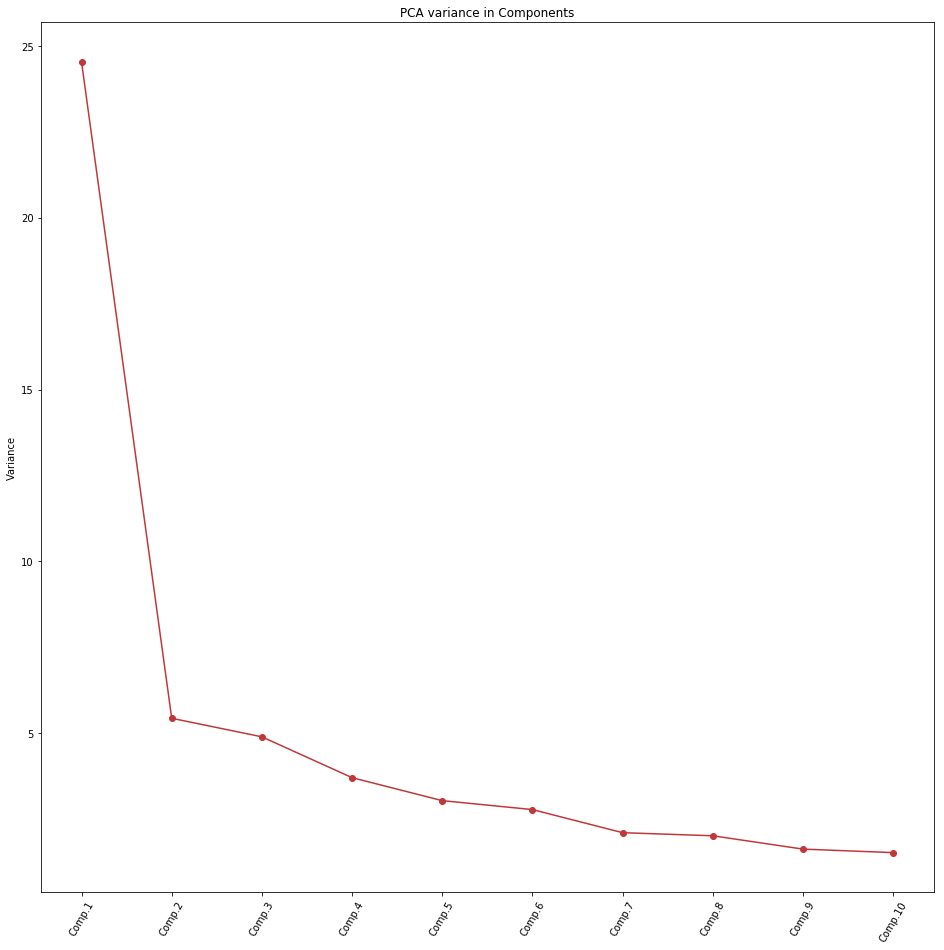

<Figure size 1152x1152 with 0 Axes>

In [141]:
screeplot(pca_n_comp, standardisedX_n_comp)
plt.savefig('./images/pca_components_variance_research_items_test' + '.png')            


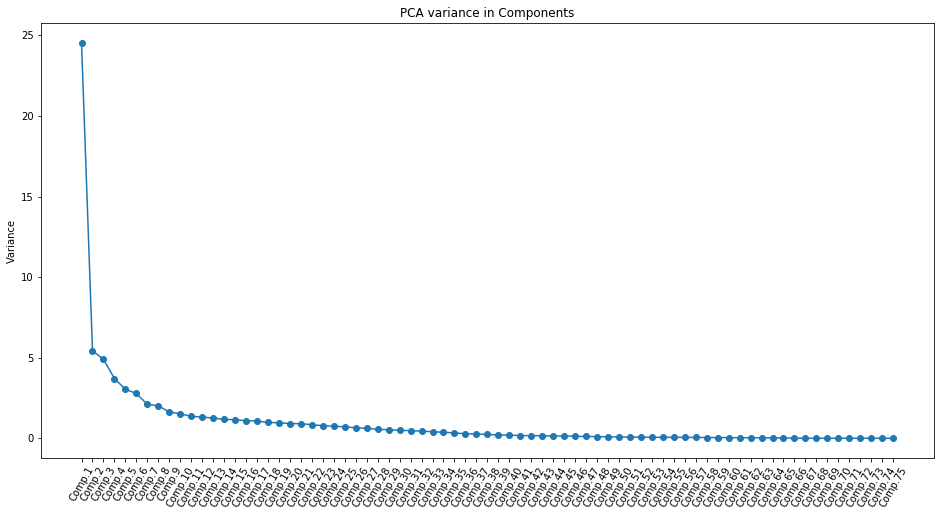

<Figure size 1152x576 with 0 Axes>

In [61]:
screeplot(pca, standardisedX)
plt.savefig('./images/pca_components_variance_research_items' + '.png')

# Can keep upto 1  component

Can be checked until 7 components

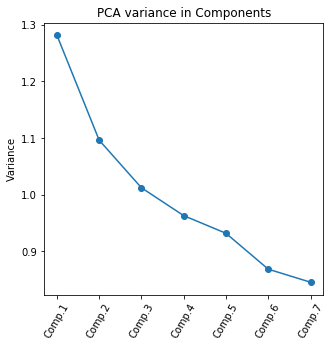

<Figure size 360x360 with 0 Axes>

In [96]:
plt.rcParams['figure.figsize'] = 5, 5
screeplot(pca_food, standardisedX_food)
plt.savefig('./images/pca_components_variance_research_items_food' + '.png')            


# Up to 1 component should be sufficient

In another measure upto component 5 be checked

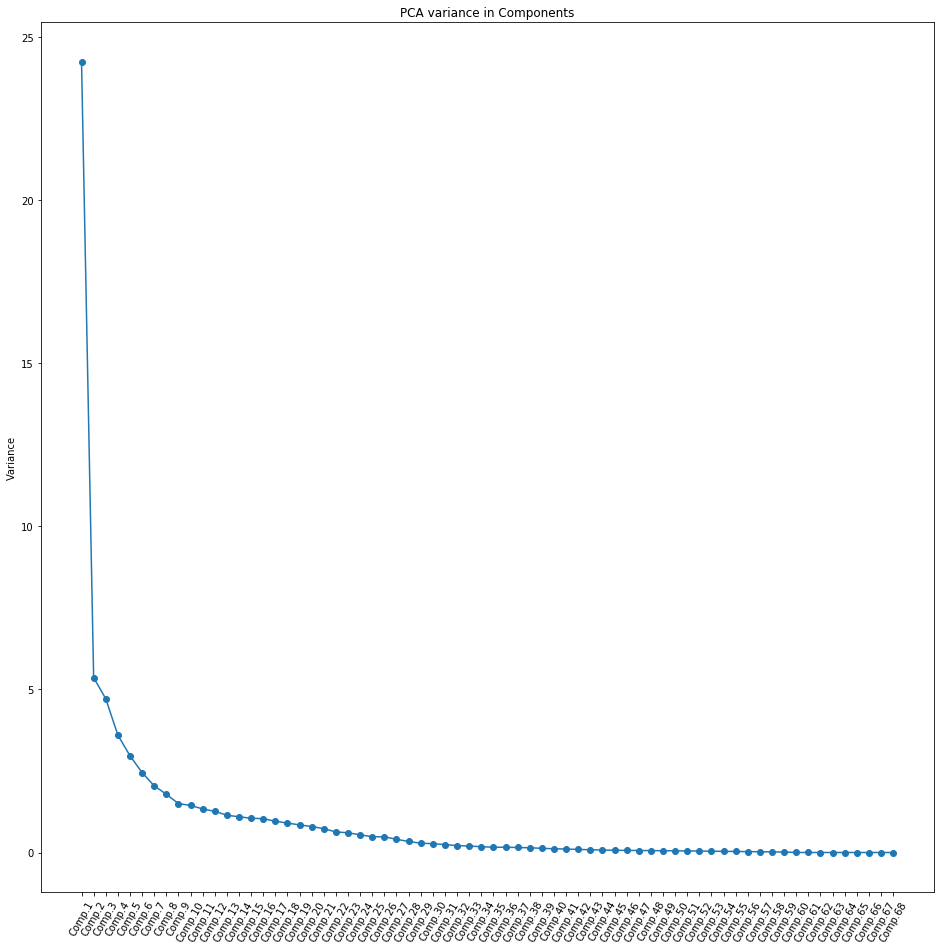

<Figure size 1152x1152 with 0 Axes>

In [108]:
plt.rcParams['figure.figsize'] = 16, 16
screeplot(pca_nutrients, standardisedX_nutrients)
plt.savefig('./images/pca_components_variance_research_items_nutrients' + '.png')            


# soles from 1 to 2  or 2 to 3 seems equal. Hence, 1st component can be enough

# or up to 7 or 8 can be kept

# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

Component 8 is the first point for line, considering that upto 7 can be retained
#summary.sdev**2

In [67]:
pca.components_[0]
np.sum(pca.components_[0]**2)

1.0000000000000004

In [68]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [70]:
calcpc(standardisedX, pca.components_[0]), calcpc(standardisedX_food, pca_food.components_[0]), calcpc(standardisedX_nutrients, pca_nutrients.components_[0])

(array([ 3.04712818,  4.93812934,  3.29735527, ...,  4.56737452,
         5.73579422, -3.50040865]),
 array([ 0.2530255 ,  1.99269337,  0.38580546, ...,  0.34209815,
         0.13718759, -0.84881559]),
 array([ 2.96528691,  4.83007605,  3.19054194, ...,  4.48957635,
         5.71741492, -3.41339331]))

In [72]:
pca.transform(standardisedX)[:, 0]
pca_food.transform(standardisedX_food)[:, 0]
pca_nutrients.transform(standardisedX_nutrients)[:, 0]

array([ 2.96528691,  4.83007605,  3.19054194, ...,  4.48957635,
        5.71741492, -3.41339331])

In [73]:
#pca.components_[1]

In [74]:
np.sum(pca.components_[1]**2), np.sum(pca_food.components_[1]**2), np.sum(pca_nutrients.components_[1]**2)

(0.9999999999999998, 1.0000000000000009, 0.9999999999999988)

In [79]:
#highest loadings for

# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work
df_drop_pca['acr'][:3]
#sorted(standardisedX['acr'])

0      6.10
1     12.82
2    150.00
Name: acr, dtype: float64

In [83]:
dbk= np.where(df_drop_pca['acr'] < 30, 'normal-mild', df_drop_pca['acr'])
dbk = np.where(df_drop_pca['acr'] > 30, 'moderate', df_drop_pca['acr'])
dbk

y = []
for aVal in df_drop_pca['acr']:
    if aVal < 30:
        y.append('normal-mild')
    if aVal > 300:
        y.append('severe')
    elif aVal < 150:
        y.append('mild-moderate-low')
    elif aVal > 150:
        #print(aVal)
        y.append('mild-moderate-high')
        
y        

['normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-high',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mil

<Figure size 864x864 with 0 Axes>

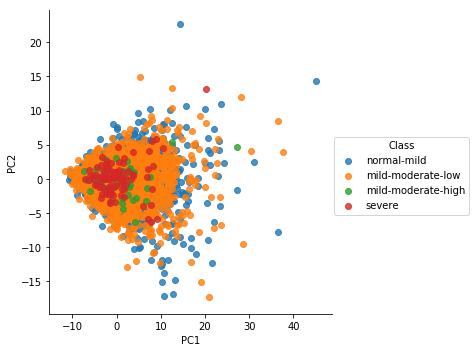

In [87]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    plt.savefig('./images/pca_components_separating_high_low_acr' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)
plt.savefig('./images/pca_components_separating_high_low_acr_overall' + '.png')

<Figure size 864x864 with 0 Axes>

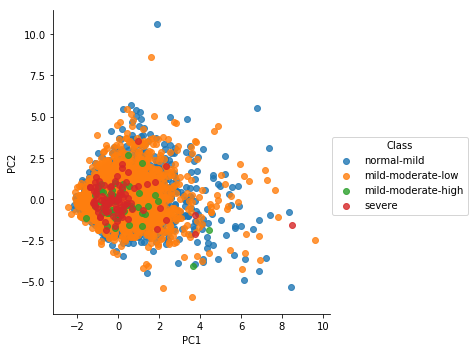

In [88]:
pca_scatter(pca_food, standardisedX_food, y)
plt.savefig('./images/pca_components_separating_high_low_acr_food' + '.png')

<Figure size 864x864 with 0 Axes>

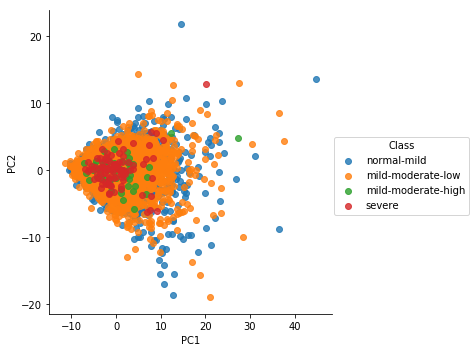

In [89]:
pca_scatter(pca_nutrients, standardisedX_nutrients, y)
plt.savefig('./images/pca_components_separating_high_low_acr_nutrients' + '.png')

# see what are affecting in the first two components

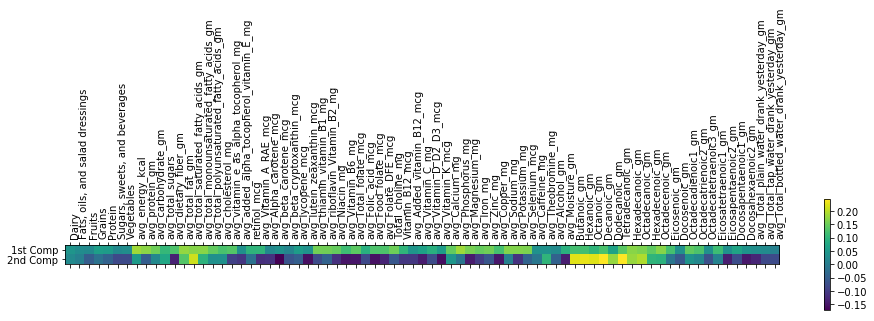

In [93]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items.columns)),df_drop_pca_research_items.columns,rotation=90,ha='left')
plt.savefig('./images/pca_all_research_items_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

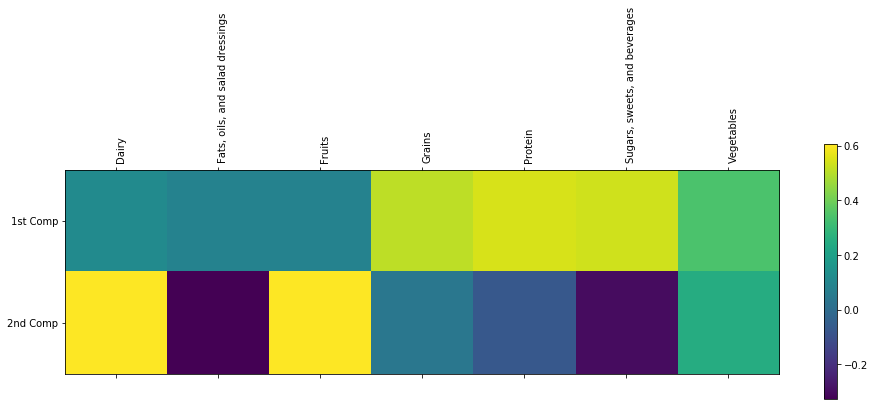

In [92]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca_food.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_food.columns)),df_drop_pca_research_items_food.columns,rotation=90,ha='left')
plt.savefig('./images/pca_food_group_items_what_contributes_to_PCA_components' + '.png')            
plt.show()# 



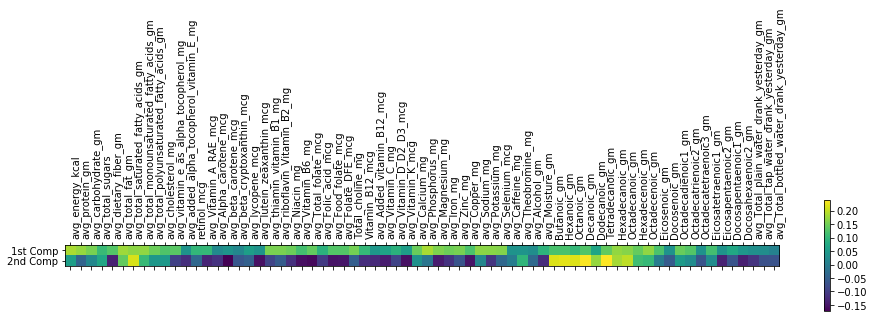

In [94]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca_nutrients.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_nutrients.columns)),df_drop_pca_research_items_nutrients.columns,rotation=90,ha='left')
plt.savefig('./images/pca_food_nutrient_items_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

# all items : see contributions upto 8 components

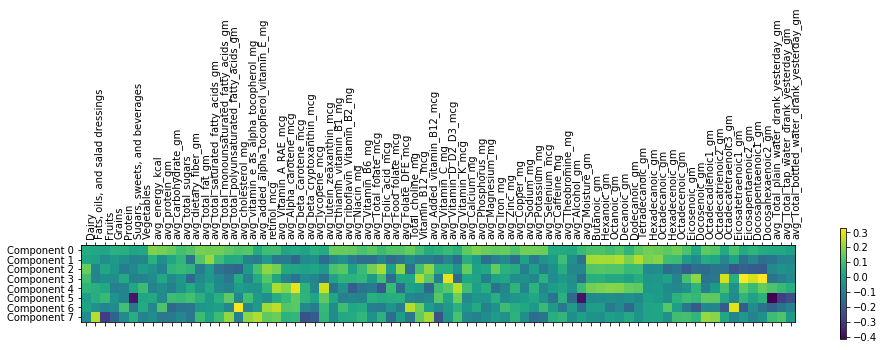

In [107]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 8

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items.columns)),df_drop_pca_research_items.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

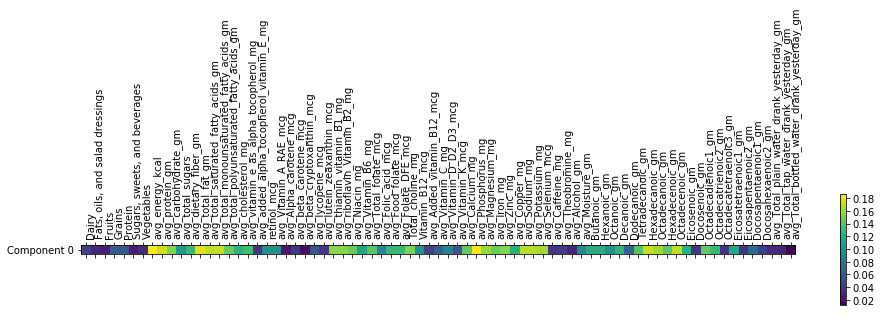

In [142]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 1

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items.columns)),df_drop_pca_research_items.columns,rotation=90,ha='left')
plt.show()# 

In [ ]:
# for Food upto 4 components

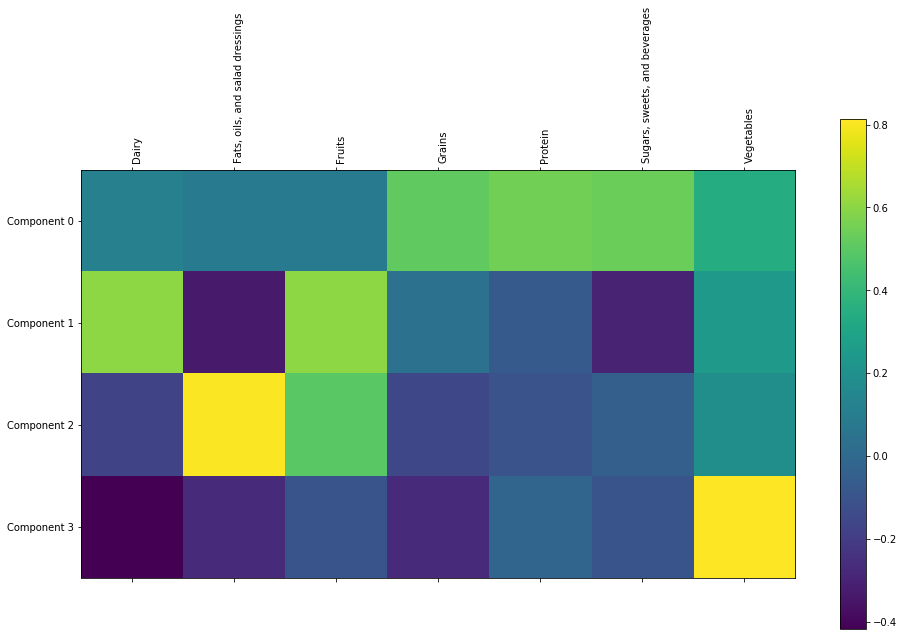

In [106]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 4

pca_components_cont = pca_food.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_food.columns)),df_drop_pca_research_items_food.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

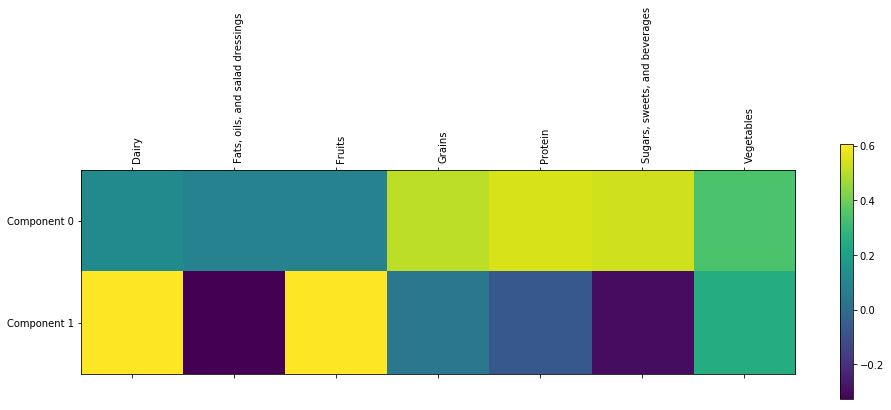

In [110]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 2

pca_components_cont = pca_food.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_food.columns)),df_drop_pca_research_items_food.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

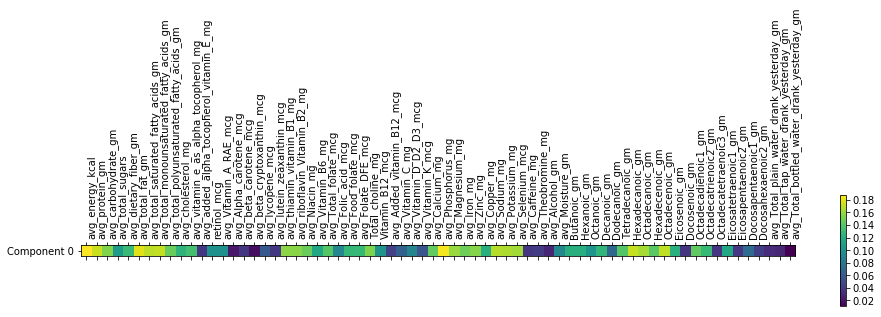

In [111]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 1

pca_components_cont = pca_nutrients.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_nutrients.columns)),df_drop_pca_research_items_nutrients.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component


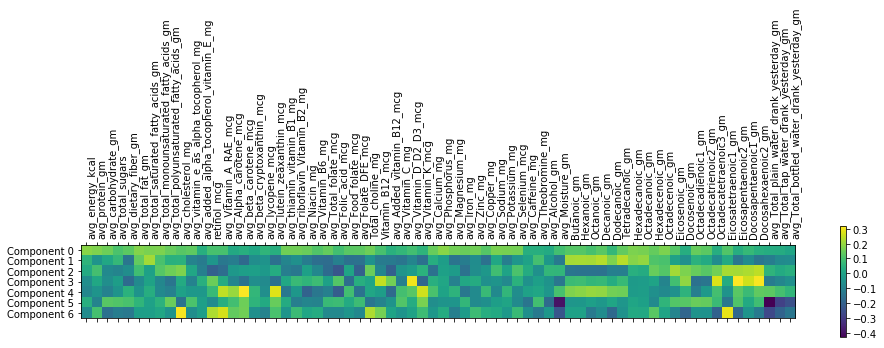

In [112]:

# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
#plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 7

pca_components_cont = pca_nutrients.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c)    

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels,ylabels,fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca_research_items_nutrients.columns)),df_drop_pca_research_items_nutrients.columns,rotation=90,ha='left')
plt.show()# 

# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component


In [113]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa


df_drop_pca_research_items_affecting = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 # data probably is not correct: further calculation and verification required
 # also these are not the focus
 #'age_from_recom_amount',
 #'avg_taken_from_recom_amount',
 #'recommended_low',
 #'recommended_high',
 
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 
 #'avg_Vitamin_B6_mg',
 #'avg_Total_folate_mcg',
 #'avg_Folic_acid_mcg',
 #'avg_Food_folate_mcg',
 #'avg_Folate_DFE_mcg',
 'Total_choline_mg',
 #'Vitamin_B12_mcg',
 #'avg_Added_vitamin_B12_mcg',
 #'avg_Vitamin_C_mg',
 #'avg_Vitamin_D_D2_D3_mcg',
 #'avg_Vitamin_K_mcg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
 #'avg_Caffeine_mg',
 #'avg_Theobromine_mg',
 #'avg_Alcohol_gm',
 #'avg_Moisture_gm',
                 
 #'Butanoic_gm',
 #'Hexanoic_gm',
 #'Octanoic_gm',
 #'Decanoic_gm',
 #'Dodecanoic_gm',
 #'Tetradecanoic_gm',
 #'Hexadecanoic_gm',
 #'Octadecanoic_gm',
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 #'Eicosenoic_gm',
 #'Docosenoic_gm',
 #'Octadecadienoic1_gm',
 #'Octadecatrienoic2_gm',
 #'Octadecatetraenoic3_gm',
 #'Eicosatetraenoic1_gm',
 #'Eicosapentaenoic2_gm',
 #'Docosapentaenoic1_gm',
 #'Docosahexaenoic2_gm',
 #'avg_Total_plain_water_drank_yesterday_gm',
 #'avg_Total_tap_water_drank_yesterday_gm',
 #'avg_Total_bottled_water_drank_yesterday_gm'
 'acr'
                               
    ]
]


In [116]:
#df_drop_pca_research_items_affecting.corr()

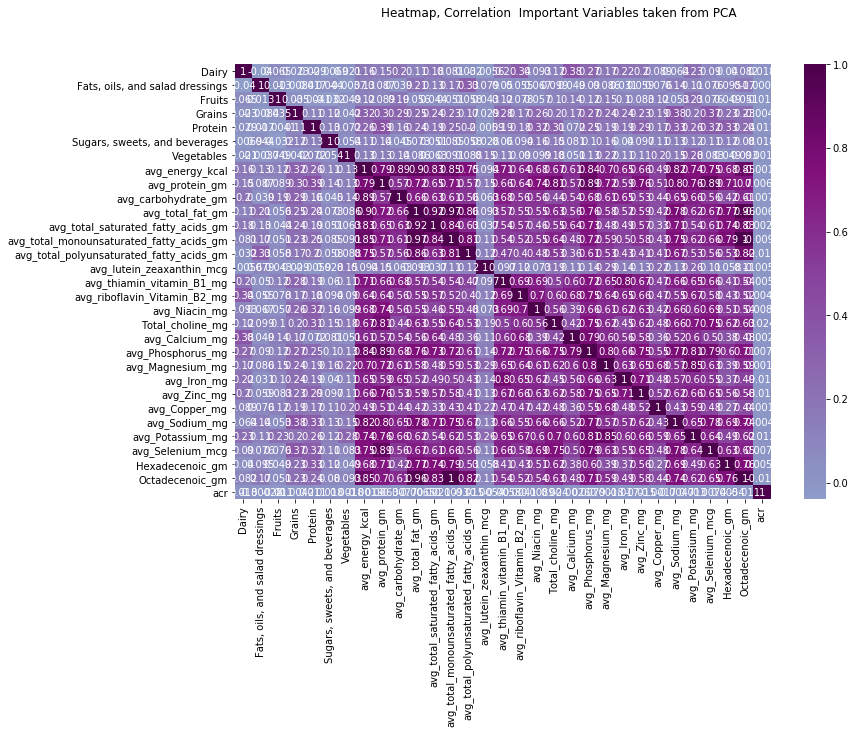

In [139]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_research_items_affecting.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu",
            center=0
           
           );
plt.suptitle('Heatmap, Correlation  Important Variables taken from PCA');


In [118]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa


df_drop_pca_research_items_affecting_food = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
#'acr',   
#'kidney_failed',
        
 'Dairy',
 'Fats, oils, and salad dressings',
 'Fruits',
 'Grains',
 'Protein',
 'Sugars, sweets, and beverages',
 'Vegetables',
 
 'acr'
                               
    ]
]


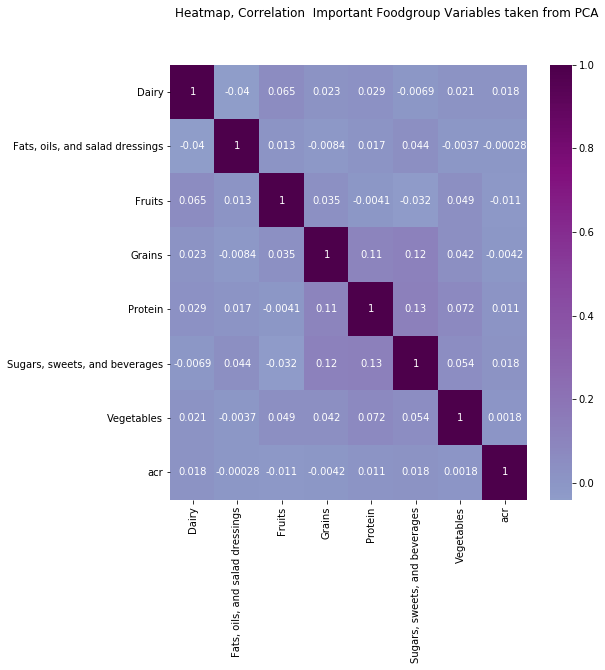

In [135]:
#sns.set_palette('RdBu')
plt.figure(figsize=(8, 8))

df_drop_pca_research_items_affecting_food = (df_drop_pca_research_items_affecting_food - df_drop_pca_research_items_affecting_food.mean())/ (df_drop_pca_research_items_affecting_food.max() - df_drop_pca_research_items_affecting_food.min())

corr = df_drop_pca_research_items_affecting_food.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
            cmap="BuPu",
            center=0
           );
plt.suptitle('Heatmap, Correlation  Important Foodgroup Variables taken from PCA');

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

In [137]:
# will now create heatmaps for all of the stuff that seemed to be affecting: food items and nutrients
# all food items as considering how many components we take, all food items affecting probably in a different dimension
# nutrients that will consider: kcal, protein, carbo, fat, luten to niacin, choline, calcium, phos, mag, iron, sodium, copper potassiusn, selenium, hexa, octa


df_drop_pca_research_items_affecting_nutrients = df_drop_pca[
    
[

    
#'participant_id',
#'gender',        
#'participant_age',

    
 
 # avg amounts are from nutrients table/data; also shows average of two days from total taken
 # these are not related to individual foods but total from all foods
 'avg_energy_kcal',
 'avg_protein_gm',
 'avg_carbohydrate_gm',
 'avg_total_fat_gm',
 'avg_total_saturated_fatty_acids_gm',
 'avg_total_monounsaturated_fatty_acids_gm',
 'avg_total_polyunsaturated_fatty_acids_gm',
 'avg_lutein_zeaxanthin_mcg',
 'avg_thiamin_vitamin_B1_mg',
 'avg_riboflavin_Vitamin_B2_mg',
 'avg_Niacin_mg',
 
 'Total_choline_mg',
 'avg_Calcium_mg',
 'avg_Phosphorus_mg',
 'avg_Magnesium_mg',
 'avg_Iron_mg',
 'avg_Zinc_mg',
 'avg_Copper_mg',
 'avg_Sodium_mg',
 'avg_Potassium_mg',
 'avg_Selenium_mcg',
                 
 'Hexadecenoic_gm',
 'Octadecenoic_gm',
 'acr'
                               
    ]
]


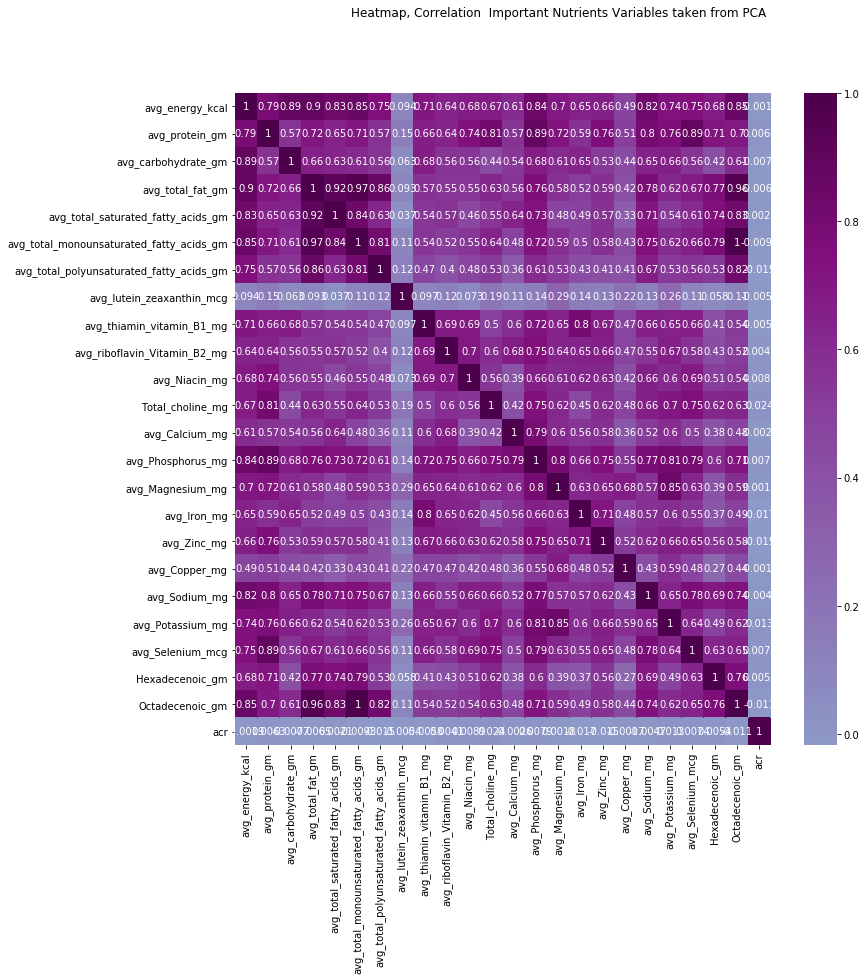

In [138]:
plt.figure(figsize=(12, 12))

#df_drop_pca_research_items_affecting_nutrients = (df_drop_pca_research_items_affecting_nutrients - df_drop_pca_research_items_affecting_nutrients.mean())/ (df_drop_pca_research_items_affecting_nutrients.max() - df_drop_pca_research_items_affecting_nutrients.min())


corr = df_drop_pca_research_items_affecting_nutrients.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           
           cmap="BuPu",
            center=0);
plt.suptitle('Heatmap, Correlation  Important Nutrients Variables taken from PCA');


# some code from below can be seen useful though can be ignored for now

In [119]:
df_drop_pca_research_items['acr'] = merged_individual_foods_and_nutrients_df['acr']
df_drop_pca_research_items.columns

Index(['Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'avg_energy_kcal', 'avg_protein_gm', 'avg_carbohydrate_gm',
       'avg_total_sugars', 'avg_dietary_fiber_gm', 'avg_total_fat_gm',
       'avg_total_saturated_fatty_acids_gm',
       'avg_total_monounsaturated_fatty_acids_gm',
       'avg_total_polyunsaturated_fatty_acids_gm', 'avg_cholesterol_mg',
       'avg_vitamin_e_as_alpha_tocopherol_mg',
       'avg_added_alpha_tocopherol_vitamin_E_mg', 'retinol_mcg',
       'avg_Vitamin_A_RAE_mcg', 'avg_Alpha_carotene_mcg',
       'avg_beta_carotene_mcg', 'avg_beta_cryptoxanthin_mcg',
       'avg_lycopene_mcg', 'avg_lutein_zeaxanthin_mcg',
       'avg_thiamin_vitamin_B1_mg', 'avg_riboflavin_Vitamin_B2_mg',
       'avg_Niacin_mg', 'avg_Vitamin_B6_mg', 'avg_Total_folate_mcg',
       'avg_Folic_acid_mcg', 'avg_Food_folate_mcg', 'avg_Folate_DFE_mcg',
       'Total_choline_mg', 'Vitamin_B12_mcg', 'avg_Added_v

In [120]:
df_drop_pca_research_items.corr()

Dairy  \
Dairy                                       1.000000   
Fats, oils, and salad dressings            -0.039729   
Fruits                                      0.064648   
Grains                                      0.022838   
Protein                                     0.029117   
Sugars, sweets, and beverages              -0.006897   
Vegetables                                  0.020622   
avg_energy_kcal                             0.163875   
avg_protein_gm                              0.148636   
avg_carbohydrate_gm                         0.203047   
avg_total_sugars                            0.235831   
avg_dietary_fiber_gm                        0.126876   
avg_total_fat_gm                            0.112301   
avg_total_saturated_fatty_acids_gm          0.177414   
avg_total_monounsaturated_fatty_acids_gm    0.080526   
avg_total_polyunsaturated_fatty_acids_gm    0.031877   
avg_cholesterol_mg                          0.037953   
avg_vitamin_e_as_alpha_tocopherol_mg        0.079148   
avg_added_alpha_tocopherol_vitamin_E_mg     0.066901   
retinol_mcg                                 0.288265   
avg_Vitamin_A_RAE_mcg                       0.230740   
avg_Alpha_carotene_mcg                      0.030512   
avg_beta_carotene_mcg                       0.006926   
avg_beta_cryptoxanthin_mcg                  0.000468   
avg_lycopene_mcg                            0.015513   
...                                              ...   
avg_Alcohol_gm                             -0.060411   
avg_Moisture_gm                             0.012404   
Butanoic_gm                                 0.287741   
Hexanoic_gm                                 0.300641   
Octanoic_gm                                 0.227705   
Decanoic_gm                                 0.243483   
Dodecanoic_gm                               0.107903   
Tetradecanoic_gm                            0.233927   
Hexadecanoic_gm                             0.148572   
Octadecanoic_gm                             0.139237   
Hexadecenoic_gm                             0.040199   
Octadecenoic_gm                             0.081690   
Eicosenoic_gm                               0.017263   
Docosenoic_gm                              -0.008950   
Octadecadienoic1_gm                         0.029433   
Octadecatrienoic2_gm                        0.048382   
Octadecatetraenoic3_gm                      0.019654   
Eicosatetraenoic1_gm                       -0.028851   
Eicosapentaenoic2_gm                       -0.007881   
Docosapentaenoic1_gm                        0.000128   
Docosahexaenoic2_gm                        -0.004374   
avg_Total_plain_water_drank_yesterday_gm   -0.052073   
avg_Total_tap_water_drank_yesterday_gm     -0.013793   
avg_Total_bottled_water_drank_yesterday_gm -0.052196   
acr                                         0.017986   

                                            Fats, oils, and salad dressings  \
Dairy                                                             -0.039729   
Fats, oils, and salad dressings                                    1.000000   
Fruits                                                             0.013228   
Grains                                                            -0.008416   
Protein                                                            0.017072   
Sugars, sweets, and beverages                                      0.044024   
Vegetables                                                        -0.003734   
avg_energy_kcal                                                    0.131064   
avg_protein_gm                                                     0.087339   
avg_carbohydrate_gm                                                0.038971   
avg_total_sugars                                                   0.062268   
avg_dietary_fiber_gm                                               0.038608   
avg_total_fat_gm                                                   0.211542   
avg_total_saturated_fatty_ac

In [73]:
#df = pd.read_csv('mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df = df.drop( ['Recommended Sugars sweets and beverages amount', ' % Population got CKD', ' People (or %) progressed to Stage 3 CKD', ' People (or %) progressed to Stage 4 CKD', ' People (or %) progressed to ESRD', ' Received dietitian care (Optional)', ' Did not Receive dietitian care (Optional)', ' Patients went for dialysis', ' Patients went for Kidney Transplantation' ], axis=1)
#df.head()

In [74]:
df_drop_pca_research_items.corr()

participant_id    gender  \
participant_id                                  1.000000 -0.009905   
gender                                         -0.009905  1.000000   
participant_age                                -0.023632  0.009581   
acr                                            -0.015478  0.014099   
kidney_failed                                  -0.026774  0.021010   
Dairy                                           0.015842 -0.083617   
Fats, oils, and salad dressings                -0.012274  0.009365   
Fruits                                         -0.002349 -0.032356   
Grains                                         -0.004175 -0.173365   
Protein                                        -0.021225 -0.138151   
Sugars, sweets, and beverages                  -0.002851 -0.101627   
Vegetables                                      0.009332 -0.069020   
avg_energy_kcal                                -0.004740 -0.282418   
avg_protein_gm                                  0.000749 -0.269886   
avg_carbohydrate_gm                            -0.005107 -0.239453   
avg_total_sugars                               -0.010168 -0.145859   
avg_dietary_fiber_gm                            0.015191 -0.136147   
avg_total_fat_gm                               -0.004872 -0.214999   
avg_total_saturated_fatty_acids_gm             -0.013143 -0.208937   
avg_total_monounsaturated_fatty_acids_gm        0.000292 -0.215700   
avg_total_polyunsaturated_fatty_acids_gm        0.004793 -0.143413   
avg_cholesterol_mg                             -0.003206 -0.172018   
avg_vitamin_e_as_alpha_tocopherol_mg            0.021788 -0.104180   
avg_added_alpha_tocopherol_vitamin_E_mg         0.016422 -0.009138   
retinol_mcg                                     0.006995 -0.090630   
...                                                  ...       ...   
phosphorous                                     0.000544 -0.253173   
magnesium                                       0.007374 -0.212463   
potassium                                       0.002718 -0.235574   
alcohol                                        -0.006182 -0.131924   
a_sample_food_code                             -0.003641  0.021062   
systolic_pressure                              -0.012304 -0.028870   
diastolic_pressure                             -0.014589 -0.019344   
albumin_urine_mu_g                             -0.018052  0.002309   
albumin_urine_mg                               -0.018052  0.002309   
creatinine_mu_mol                              -0.022751 -0.155903   
creatinine_mg                                  -0.022751 -0.155903   
received_dialysis_in_12_months                 -0.016795  0.001055   
kidney_stones                                  -0.029974  0.029540   
passed_kidney_stones_12_months                 -0.008235 -0.034258   
urinary_leakage_frequency                      -0.016821  0.143732   
urine_lose_each_time                           -0.002463  0.160721   
leak_during_activities                         -0.026534 -0.113590   
how_frequent_leak_occurs                       -0.007259  0.263073   
urinated_before_reaching_toilet                -0.023509 -0.045340   
how_frequent                                   -0.014732  0.115778   
leak_during_nonphysical_activities             -0.026223 -0.021821   
how_frequest_leak_nonphysical                  -0.003790  0.085303   
how_much_leak_bothering                        -0.016008  0.210185   
how_much_daily_activities_affected             -0.022707  0.034991   
count_night_time_urinate                             NaN       NaN   

                                          participant_age       acr  \
participant_id                                  -0.023632 -0.015478   
gender                                           0.009581  0.014099   
participant_age                                  1.000000  0.050986   
acr                                              0.050986  1.000000   
kidney_failed                                 

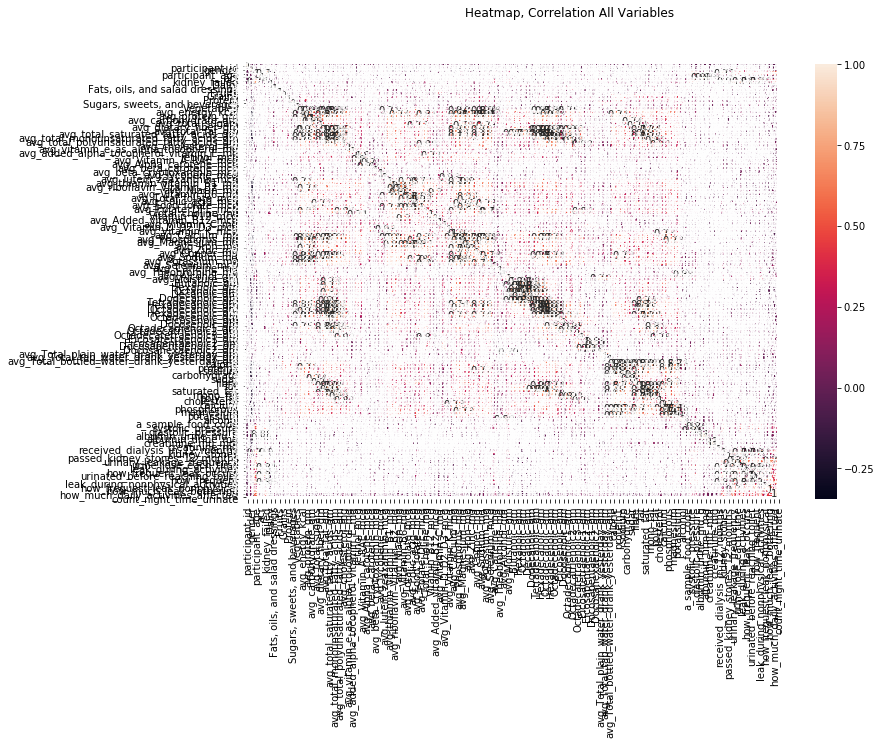

In [75]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_research_items.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

In [76]:
# The above plot kind of shows the correlation with CKD and ACR
df_drop_pca_research_items.columns

Index(['participant_id', 'gender', 'participant_age', 'acr', 'kidney_failed',
       'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein',
       ...
       'urine_lose_each_time', 'leak_during_activities',
       'how_frequent_leak_occurs', 'urinated_before_reaching_toilet',
       'how_frequent', 'leak_during_nonphysical_activities',
       'how_frequest_leak_nonphysical', 'how_much_leak_bothering',
       'how_much_daily_activities_affected', 'count_night_time_urinate'],
      dtype='object', length=117)

In [105]:
# The following code are to be ignored


In [77]:
df_drop_pca_important = df_drop_pca[
    
    
    [  'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'participant_age', 'gender', 
       #'age_from_recom_amount',
       #'avg_taken_from_recom_amount', 
       #'recommended_low', 
       #'recommended_high',
       'acr', 
       'kidney_failed', 'systolic_pressure', 'diastolic_pressure',
       'calorie', 'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat',
       'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium',
       'phosphorous', 'magnesium', 'potassium', 'alcohol',
       #'a_sample_food_code', 
       'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 
        #'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_frequent',
       'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       'how_much_leak_bothering', 'how_much_daily_activities_affected',
       'count_night_time_urinate']
    
]

KeyError: "['protein'] not in index"

In [ ]:
df_drop_pca_important.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_important.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

#  Will Check on Actual Taken Amount Only ####
# age_from and age_to can be removed

In [ ]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
# df = df.drop([ 'age_from', 'age_to' ], axis=1)
df.head()

In [ ]:
df.describe()

In [ ]:
#find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052


ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000
    

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');


In [ ]:
# Without Age Groups

In [ ]:
df_without_ages = df.drop(['age_from', 'age_to', ' Gender'], axis=1)
df_without_ages.head()

In [ ]:
df_without_ages.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_without_ages.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_actual_intake_amount' + '.png')            

# Will use Normalization all data 

In [ ]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
# df.head()

In [ ]:
df_normalized.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052
ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_normalized_actual_intake_amount' + '.png')            

# Will check only on the difference from average recommended amount

In [ ]:
df = pd.read_csv('copy-only-diff-no-empty-data-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
df.describe()

In [ ]:
# find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	Diff Vegetable	diff protein	diff grain	diff dairy	diff fruit	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
                ESRD patients: Total (or %) deaths for target year	
                
                
 0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	0.426499	-0.273596	-0.268453	-0.364665	-0.488155	1.000000	0.828148	0.999315	0.864052

ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.359590	-0.266776	-0.263227	-0.213864	-0.392090	0.828148	1.000000	0.847294	0.995676


Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.424340	-0.278817	-0.272938	-0.362140	-0.489873	0.999315	0.847294	1.000000	0.880927


Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.401294	-0.244088	-0.246893	-0.229239	-0.387759	0.864052	0.995676	0.880927	1.000000
    
                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');

In [ ]:
df.head()
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data

df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
#df.head()

In [ ]:
df_normalized.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_diff_intake_amount_normalized' + '.png')            

# Bivariate

# The most important for Bivariate: bivariate_diff_norm.png and bivariate_diff_norm_rate_only.png. Difference in intake amounts from recommended, also normalized.



Bivariate plots on actual amount intake and target variables. will be saved in bivariate.png. The correlation pattern can be checked in the image saved

Correlation within the intake amounts do not say much as we are using actual intake amounts not differences with recomended amount. Also because, higher aged people will take higher amount. Also, normalized data will give true relation.

The correlation was shown above. Now linearity and non-linearity can be seen using the Bivariate plots. 

The plots show similarity with correlation

In [ ]:
import numpy as np 
import pandas as pd 

from IPython.display import display, HTML

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

# ref in ref section

# On Actual intake Amounts

In [ ]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual = df.drop([' Gender', 'age_from', 'age_to'], axis=1)
df_actual.head()

In [ ]:
# on actual amounts
#plt.figure(figsize=(16, 300))
sns.pairplot(df_actual,   vars=df_actual.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_group' + '.png')            
plt.show()

# On difference from recommended amount (data not normalized)

In [ ]:
df = pd.read_csv('copy-only-diff-no-actual-no-empty-cell-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

#df_actual_diff = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual_diff.head()
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual_diff = df.drop(['age_from', 'age_to'], axis=1)
df_actual_diff.head()
#df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

sns.pairplot(df_actual_diff,   vars=df_actual_diff.columns, size=5, kind='reg'); 
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff' + '.png')            
plt.show()


# On difference from recommended amount (data/diff normalized)

In [ ]:
df_normalized_diff = (df_actual_diff - df_actual_diff.mean())/ (df_actual_diff.max() - df_actual_diff.min())
df_normalized_diff.head()

sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm' + '.png')            
plt.show()


In [ ]:
df_normalized_diff = df_normalized_diff.drop([' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates'], axis=1)
df_normalized_diff.head()

In [ ]:
sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
plt.suptitle('Bivariate : Diff : Food Group: Normalized\n')
plt.ylabel('Difference in Intake amount from Recommended : Normalized')
plt.xlabel('Intakes')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm_rate_only' + '.png')            
plt.show()

In [ ]:
# can be ignored
"""
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()

plt.figure(figsize=(14, 14))
sns.pairplot(df_esrdonly, diag_kind='kde');
plt.xlabel('Bivariate Plot, Difference from Recommended Variables, Total ESRD target variable');

#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize'] = 16, 16
pd.plotting.scatter_matrix(df_esrdonly, diagonal="kde")
plt.suptitle('Scatter Matrix');
plt.show();
"""

# PCA

Applying PCA on Difference data

In [ ]:
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()
#df_esrdonly.head()

In [ ]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

import sklearn 
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_esrdonly)
standardisedX = pd.DataFrame(standardisedX, index=df_esrdonly.index, columns=df_esrdonly.columns)
standardisedX.apply(np.mean)

In [ ]:
standardisedX.apply(np.std)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

In [ ]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary


In [ ]:
summary = pca_summary(pca, standardisedX)

In [ ]:
# First two component can define over 95% 

In [ ]:
np.sum(summary.sdev**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 8, 8   

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()



screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            

In [ ]:
# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

In [ ]:
summary.sdev**2

Can be retained

PC1	4.263124
PC2	1.449435


In [ ]:
pca.components_[0]

In [ ]:
np.sum(pca.components_[0]**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [ ]:
calcpc(standardisedX, pca.components_[0])

In [ ]:
pca.transform(standardisedX)[:, 0]

In [ ]:
pca.components_[1]

In [ ]:
np.sum(pca.components_[1]**2)

highest loadings for

In [ ]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [ ]:
df_esrdonly[' ESRD patients: Avg. Annual Mortality rates']
sorted(standardisedX[' ESRD patients: Avg. Annual Mortality rates'])

In [ ]:
# Define high and low mortality

In [ ]:
y = df_esrdonly[' ESRD patients: Avg. Annual Mortality rates'] #< 0.5
# from normalized data. > 0.5 = high mortality
print('as the older age show higher mortality, does it mean th')
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y


In [ ]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Only two components can separate the mortality data. True = High ')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            


In [ ]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(df_esrdonly.columns)),df_esrdonly.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

In [ ]:
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# How the intake differences contributed for the affecting PCA components

In [ ]:
diffs = list(df_esrdonly.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_esrdonly[diffs].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

Vegetable by itself is important - contributing factors

protein + grain + then fruit

grain with fruit -- slighly with dairy

dairy with protein and grain*

fruit with protein and grain then dairy


# References

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

#ref https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
#



https://www.pearsonhighered.com/gould-statistics-2e-info/assets/pdf/sample-chapter-ess-ch04.pdf
    
https://www.kaggle.com/amanajmera1/linear-regression-model-on-nba-dataset
    
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch04.html
    
http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/
    
https://www.graphpad.com/support/faq/what-is-the-difference-between-correlation-and-linear-regression/
    
    
https://www.statsdirect.com/help/regression_and_correlation/simple_linear.htm
    
    
https://erc.barnard.edu/spss/pearsons_r
    
    
https://www.statpac.com/statistics-calculator/correlation-regression.htm
    
https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
    
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression
    
https://www.statisticssolutions.com/bivariate-correlation/
    
https://data-flair.training/blogs/python-statistics/
    

https://www.kaggle.com/naina04/bivariate-plotting-with-pandas
    
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751
    
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
    
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
    
    

# References:
    
Number of columns to display    
https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


# Misc to help with Regression

In [7]:
folder = 'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
os.listdir(folder)

['consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx',
 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'more-columns-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'New Microsoft Office Excel Worksheet.xlsx',
 'New Text Document.txt',
 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx']

In [8]:
file = folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'

In [9]:
excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


['consolidated-food-group-acr']

In [10]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)

participant_id  participant_age  gender                  food_group_name  avg_food_weight_in_gms  acr  kidney_failed  systolic_pressure  diastolic_pressure  calory  protein  sodium  carbohydrate  sugar  fibre    fat  saturated_fat  mono_fat  poly_fat  cholesterol  calcium  phosphorous  magnesium  potassium  alcohol                m_food_group_name  a_sample_food_code        a_sample_food   a_sample_food_name  food_group_id
0           83732               62       1                            Dairy                  245.47  6.1            2.0              128.0                70.0   298.0    15.37   210.0         23.42  24.64    0.0  15.86          9.101     3.963     0.952         49.0    551.0        410.0       49.0      644.0      0.0                            Dairy            12210400          Milk, whole          MILK, WHOLE             11
1           83732               62       1  Fats, oils, and salad dressings                   21.31  6.1            2.0              128.0                70.0   153.0     0.13   183.0          0.25   0.08    0.0  17.12          3.460     5.538     7.579          6.0      6.0          5.0        1.0        9.0      0.0  Fats, oils, and salad dressings            83107000  Mayonnaise, regular  MAYONNAISE, REGULAR             17
2           83732               62       1                           Fruits                  197.00  6.1            2.0              128.0                70.0   180.0     2.20     2.0         46.14  24.71    5.3   0.67          0.226     0.065     0.147          0.0     77.0         44.0       55.0      723.0      0.0                           Fruits            63107010          Orange, raw          ORANGE, RAW              7

In [27]:
df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

participant_id                  food_group_name  avg_food_weight_in_gms
0           83732                            Dairy                  245.47
1           83732  Fats, oils, and salad dressings                   21.31
2           83732                           Fruits                  197.00
3           83732                           Grains                  102.15
4           83732                          Protein                  154.58

In [28]:
df_food_group_only.T

0                                1       2       3        4                              5           6                                7       8        9                              10          11      12                               13      14      15       16                             17          18     19      20       21                             22          23                               24      25      26       27                             28          29     30                               31      32      33       34                             35          36     37      38      39       40                             41          42      43                               44      45      46       47                             48          49      50                               51      52      53       54                             55          56      57      58      59       60                             61          62      63      64       65                             66          67      68                               69      70      71       72                             73     74      75      76       77                             78          79      80                               81      82      83       84                             85          86     87                               88      89       90                             91          92     93                               94      95      96       97                             98          99     100     101      102                            103         104     105                              106     107     108      109                            110         111    112     113     114      115                            116         117    118     119     120      121                            122         123     124                              125     126     127      128                            129         130    131     132     133      134                            135         136    137                              138     139     140      141                            142         143    144     145     146      147                            148         149     150                              151     152     153      154                            155         156     157     158     159      160                            161         162    163     164      165                            166         167     168                              169     170     171      172                            173         174    175     176     177      178                            179         180     181     182      183                            184         185     186                              187     188     189      190                            191         192     193                              194     195     196      197                            198         199    200     201     202      203                            204         205    206                              207     208     209      210                            211         212    213     214      215                            216         217     218                              219     220     221      222                            223         224    225                              226     227     228      229                            230         231     232     233      234                            235         236     237     238      239                            240         241     242     243     244      245                            246         247    248                              249     250     251      252                            253         254    255     256     257      258                            259         260    261     262      263                            264         265                              266     267     268      269                            270         271    272     273     274      275               

In [29]:
df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

avg_food_weight_in_gms
participant_id food_group_name                                        
83732          Dairy                                            245.47
               Fats, oils, and salad dressings                   21.31
               Fruits                                           197.00
               Grains                                           102.15
               Protein                                          154.58
               Sugars, sweets, and beverages                    357.50
               Vegetables                                        68.38
83733          Fats, oils, and salad dressings                   14.19
               Grains                                           201.73
               Protein                                          272.00
               Sugars, sweets, and beverages                    889.16
               Vegetables                                        94.84
83734          Dairy                                            266.92
               Fats, oils, and salad dressings                   16.89
               Fruits                                           350.33
               Grains                                            79.50
               Protein                                          117.60
               Sugars, sweets, and beverages                    430.50
               Vegetables                                       126.27
83735          Dairy                                             15.50
               Grains                                            55.15
               Protein                                          242.00
               Sugars, sweets, and beverages                    160.33
               Vegetables                                        89.30
83736          Fats, oils, and salad dressings                   28.38
...                                                                ...
93697          Fruits                                            52.83
               Grains                                            59.25
               Protein                                           73.45
               Sugars, sweets, and beverages                    108.98
               Vegetables                                        16.74
93699          Dairy                                            178.25
               Fats, oils, and salad dressings                   15.00
               Fruits                                           189.00
               Grains                                           240.91
               Protein                                          121.35
               Sugars, sweets, and beverages                    186.68
               Vegetables                                        29.54
93701          Dairy                                            186.00
               Fruits                                           164.00
               Grains                                           176.12
               Protein                                           78.63
               Sugars, sweets, and beverages                    113.33
               Vegetables                                       159.06
93702          Dairy                                             19.25
               Fats, oils, and salad dressings                   15.92
               Fruits                                           106.39
               Grains                                            28.00
               Protein                                          102.97
               Sugars, sweets, and beverages                    374.40
               Vegetables                                        61.50

[45419 rows x 1 columns]

In [32]:
df_food_group_only_index_unstack = df_food_group_only_index.unstack()

In [34]:
df_food_group_only_index_unstack.head()

avg_food_weight_in_gms                                                                                                 
food_group_name                  Dairy Fats, oils, and salad dressings  Fruits  Grains Protein Sugars, sweets, and beverages Vegetables
participant_id                                                                                                                         
83732                           245.47                           21.31  197.00  102.15  154.58                        357.50      68.38
83733                              NaN                           14.19     NaN  201.73  272.00                        889.16      94.84
83734                           266.92                           16.89  350.33   79.50  117.60                        430.50     126.27
83735                            15.50                             NaN     NaN   55.15  242.00                        160.33      89.30
83736                              NaN                           28.38   84.83  158.00   64.50                        237.56       6.00

In [35]:
foodgroup_acr_data_df.columns

Index(['participant_id', 'participant_age', 'gender', 'food_group_name', 'avg_food_weight_in_gms', 'acr', 'kidney_failed', 'systolic_pressure', 'diastolic_pressure', 'calory', 'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous', 'magnesium', 'potassium', 'alcohol', 'm_food_group_name', 'a_sample_food_code', 'a_sample_food', 'a_sample_food_name', 'food_group_id'], dtype='object')

In [36]:
df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

participant_id  participant_age  gender  acr  kidney_failed  systolic_pressure  diastolic_pressure  calory  protein  sodium  carbohydrate  sugar  fibre    fat  saturated_fat  mono_fat  poly_fat  cholesterol  calcium  phosphorous  magnesium  potassium  alcohol                m_food_group_name  a_sample_food_code                                  a_sample_food              a_sample_food_name  food_group_id
0           83732               62       1  6.1            2.0              128.0                70.0   298.0    15.37   210.0         23.42  24.64    0.0  15.86          9.101     3.963     0.952         49.0    551.0        410.0       49.0      644.0      0.0                            Dairy            12210400                                    Milk, whole                     MILK, WHOLE             11
1           83732               62       1  6.1            2.0              128.0                70.0   153.0     0.13   183.0          0.25   0.08    0.0  17.12          3.460     5.538     7.579          6.0      6.0          5.0        1.0        9.0      0.0  Fats, oils, and salad dressings            83107000                            Mayonnaise, regular             MAYONNAISE, REGULAR             17
2           83732               62       1  6.1            2.0              128.0                70.0   180.0     2.20     2.0         46.14  24.71    5.3   0.67          0.226     0.065     0.147          0.0     77.0         44.0       55.0      723.0      0.0                           Fruits            63107010                                    Orange, raw                     ORANGE, RAW              7
3           83732               62       1  6.1            2.0              128.0                70.0   536.0    25.27  1297.0         59.61  16.83   10.6  30.90         10.758    10.965     6.869        320.0    286.0        429.0       73.0      588.0      0.0                           Grains            58160110                     Roll, white, hamburger bun      ROLL, WHITE, HAMBURGER BUN              8
4           83732               62       1  6.1            2.0              128.0                70.0   629.0    41.53  1620.0         48.67   7.96    1.6  37.24         14.511    16.936     4.167        153.0    146.0        314.0       39.0      525.0      0.0                          Protein            27564060  Ham, smoked or cured, cooked, lean only eaten  HAM, SMOKED OR CURED, COOKED,              12

In [49]:
df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

In [50]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

(7697, 31)

In [51]:
merged.head()

(avg_food_weight_in_gms, Dairy)  (avg_food_weight_in_gms, Fats, oils, and salad dressings)  (avg_food_weight_in_gms, Fruits)  (avg_food_weight_in_gms, Grains)  (avg_food_weight_in_gms, Protein)  (avg_food_weight_in_gms, Sugars, sweets, and beverages)  (avg_food_weight_in_gms, Vegetables)  participant_age  gender     acr  kidney_failed  systolic_pressure  diastolic_pressure      calory    protein      sodium  carbohydrate      sugar     fibre        fat  saturated_fat  mono_fat  poly_fat  cholesterol     calcium  phosphorous  magnesium   potassium  alcohol  a_sample_food_code  food_group_id
participant_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
83732                                    245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38             62.0     1.0    6.10            2.0              128.0                70.0  293.142857  12.738571  586.571429     33.197143  15.197143  3.042857  15.041429       5.569214  5.508571  2.997571    75.857143  170.285714   192.571429  36.857143  443.571429     0.00        5.910781e+07      10.285714
83733                                       NaN                                              14.19                                       NaN                            201.73                             272.00                                             889.16                                       94.84             53.0     1.0   12.82            2.0              146.0                88.0  775.300000  21.409000  843.300000     74.188000  35.189000  1.720000  29.830000       8.580300  9.324900  7.989300   143.800000  111.000000   418.800000  64.900000  599.200000    18.97        6.592856e+07      10.800000
83734                                    266.92                                              16.89                                    350.33                             79.50                             117.60                                             430.50                                      126.27             78.0     1.0  150.00            1.0              138.0                46.0  338.142857  14.153571  522.333333     44.706429  16.815714  5.328571  12.953571       5.459071  4.216571  3.764357    70.000000  183.523810   205.000000  66.571429  597.000000     0.00        5.919755e+07      10.285714
83735                                     15.50                                                NaN                                       NaN                             55.15                             242.00                                             160.33                                       89.30             56.0     2.0    5.69            2.0              132.0                72.0  215.400000  13.308000  423.600000     23.758000   7.176000  2.560000   8.626000       3.057600  3.341600  1.587200    27.400000  243.800000   258.000000  52.800000  395.200000     0.00        5.269247e+07       9.600000
83736                                       NaN                                              28.38                                     84.83                            158.00                              64.50                                             237.56                                        6.00             42.0     2.0   15.11 

In [54]:
merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')

In [148]:
foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)

0                                1       2       3        4                              5           6                                7       8        9                              10          11      12                               13      14      15       16                             17          18     19      20       21                             22          23                               24      25      26       27                             28          29     30                               31      32      33       34                             35          36     37      38      39       40                             41          42      43                               44      45      46       47                             48          49      50                               51      52      53       54                             55          56      57      58      59       60                             61          62      63      64     \
participant_id           83732                            83732   83732   83732    83732                          83732       83732                            83733   83733    83733                          83733       83733   83734                            83734   83734   83734    83734                          83734       83734  83735   83735    83735                          83735       83735                            83736   83736   83736    83736                          83736       83736  83737                            83737   83737   83737    83737                          83737       83737  83738   83738   83738    83738                          83738       83738   83739                            83739   83739   83739    83739                          83739       83739   83741                            83741   83741   83741    83741                          83741       83741   83742   83742   83742    83742                          83742       83742   83744   83744   
participant_age             62                               62      62      62       62                             62          62                               53      53       53                             53          53      78                               78      78      78       78                             78          78     56      56       56                             56          56                               42      42      42       42                             42          42     72                               72      72      72       72                             72          72     11      11      11       11                             11          11       4                                4       4       4        4                              4           4      22                               22      22      22       22                             22          22      32      32      32       32                             32          32      56      56   
gender                       1                                1       1       1        1                              1           1                                1       1        1                              1           1       1                                1       1       1        1                              1           1      2       2        2                              2           2                                2       2       2        2                              2           2      2                                2       2       2        2                              2           2      2       2       2        2                              2           2       1                                1       1       1        1                              1           1       1                                1       1       1        1                              1           1       2       2       2        2                              2           2       1       1   
food_group_name          Dairy  F

In [149]:
df_multi = foodgroup_acr_data_df.set_index(['participant_id', 'food_group_name'])
df_multi


participant_age  gender  avg_food_weight_in_gms     acr  kidney_failed  systolic_pressure  diastolic_pressure       calory     protein       sodium  carbohydrate       sugar      fibre        fat  saturated_fat   mono_fat   poly_fat  cholesterol      calcium  phosphorous   magnesium    potassium  alcohol                m_food_group_name  a_sample_food_code                                      a_sample_food              a_sample_food_name  food_group_id
participant_id food_group_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
83732          Dairy                                         62       1                  245.47    6.10            2.0              128.0                70.0   298.000000   15.370000   210.000000     23.420000   24.640000   0.000000  15.860000       9.101000   3.963000   0.952000    49.000000   551.000000   410.000000   49.000000   644.000000     0.00                            Dairy            12210400                                        Milk, whole                     MILK, WHOLE             11
               Fats, oils, and salad dressings               62       1                   21.31    6.10            2.0              128.0                70.0   153.000000    0.130000   183.000000      0.250000    0.080000   0.000000  17.120000       3.460000   5.538000   7.579000     6.000000     6.000000     5.000000    1.000000     9.000000     0.00  Fats, oils, and salad dressings            83107000                                Mayonnaise, regular             MAYONNAISE, REGULAR             17
               Fruits                                        62       1                  197.00    6.10            2.0              128.0                70.0   180.000000    2.200000     2.000000     46.140000   24.710000   5.300000   0.670000       0.226000   0.065000   0.147000     0.000000    77.000000    44.000000   55.000000   723.000000     0.00                           Fruits            63107010                                        Orange, raw                     ORANGE, RAW              7
               Grains                                        62       1                  102.15    6.10            2.0              128.0                70.0   536.000000   25.270000  1297.000000     59.610000   16.830000  10.600000  30.900000      10.758000  10.965000   6.869000   320.000000   286.000000   429.000000   73.000000   588.000000     0.00                           Grains            58160110                         Roll, white, hamburger bun      ROLL, WHITE, HAMBURGER BUN              8
               Protein                                       62       1                  154.58    6.10            2.0              128.0                70.0   629.000000   41.530000  1620.000000     48.670000    7.960000   1.600000  37.240000      14.511000  16.936000   4.167000   153.000000   146.000000   314.000000   39.000000   525.000000     0.00                          Protein            27564060      Ham, smoked or cured, cooked, lean only eaten  HAM, SMOKED OR CURED, COOKED,              12
               Sugars, sweets, and beverages                 62       1                  357.50    6.10            2.0              128.0                70.0   114.000000    0.660000    48.000000     29.640000   28.560000   0.000000   0.180000       0.009500   0.073000   0.015000     0.000000    36.000000    54.000000   15.000000   239.000000     0.00    Sugars, sweets, and beverages            94100100                                         Water, tap                      WATER, TAP             16
        

In [18]:
df_multi = df_multi.unstack()

In [19]:
df_multi.head()

avg_food_weight_in_gms                                                                                                 
food_group_name                  Dairy Fats, oils, and salad dressings  Fruits  Grains Protein Sugars, sweets, and beverages Vegetables
participant_id                                                                                                                         
83732                           245.47                           21.31  197.00  102.15  154.58                        357.50      68.38
83733                              NaN                           14.19     NaN  201.73  272.00                        889.16      94.84
83734                           266.92                           16.89  350.33   79.50  117.60                        430.50     126.27
83735                            15.50                             NaN     NaN   55.15  242.00                        160.33      89.30
83736                              NaN                           28.38   84.83  158.00   64.50                        237.56       6.00

In [22]:
df_some = foodgroup_acr_data_df[['participant_id', 'participant_age']]
df_some.head()

participant_id  participant_age
0           83732               62
1           83732               62
2           83732               62
3           83732               62
4           83732               62

In [26]:
df_some.merge(df_multi, how='left', left_on='participant_id', right_on='participant_id')

participant_id  participant_age  (avg_food_weight_in_gms, Dairy)  (avg_food_weight_in_gms, Fats, oils, and salad dressings)  (avg_food_weight_in_gms, Fruits)  (avg_food_weight_in_gms, Grains)  (avg_food_weight_in_gms, Protein)  (avg_food_weight_in_gms, Sugars, sweets, and beverages)  (avg_food_weight_in_gms, Vegetables)
0               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
1               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
2               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
3               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
4               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
5               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
6               83732               62                           245.47                                              21.31                                    197.00                            102.15                             154.58                                             357.50                                       68.38
7               83733               53                              NaN                                              14.19                                       NaN                            201.73                             272.00                                             889.16                                       94.84
8               83733               53                              NaN                                              14.19                                       NaN                            201.73                             272.00                                             889.16                                       94.84
9               83733               53                              NaN                                              14.19                                       NaN                            201.73                             272.00                                             889.16                                       94.84
10              83733               53                              NaN                                              14.19                                       NaN                            201.73                             272.00                                             889.16                                       94.84
11              83733               53                     

In [25]:
Ref: https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
        

SyntaxError: invalid syntax (<ipython-input-25-4456e86356ff>, line 1)

In [ ]:
# backup

folder = 'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
os.listdir(folder)

file = folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)


df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

foodgroup_acr_data_df.columns

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

merged.head()

merged.to_csv(folder + 'food_group_data_ready_for_excel_regression.csv')


foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)




In [71]:
https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html    

SyntaxError: invalid syntax (<ipython-input-71-d09d585c3640>, line 1)

In [143]:
#df_drop_pca.to_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor = pd.read_csv(data_folder + 'applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor.head(5)

Unnamed: 0  participant_id  gender  participant_age     acr  kidney_failed  \
0           0           83732       1               62    6.10            2.0   
1           1           83733       1               53   12.82            2.0   
2           2           83734       1               78  150.00            1.0   
3           3           83735       2               56    5.69            2.0   
4           4           83736       2               42   15.11            2.0   

    Dairy  Fats, oils, and salad dressings  Fruits  Grains  Protein  \
0  245.47                            21.31  197.00  102.15   154.58   
1    0.00                            14.19    0.00  201.73   272.00   
2  266.92                            16.89  350.33   79.50   117.60   
3   15.50                             0.00    0.00   55.15   242.00   
4    0.00                            28.38   84.83  158.00    64.50   

   Sugars, sweets, and beverages  Vegetables  avg_energy_kcal  avg_protein_gm  \
0                         357.50       68.38           2262.5         104.815   
1                         889.16       94.84           3467.5         114.110   
2                         430.50      126.27           2205.0         105.140   
3                         160.33       89.30           1340.0          70.380   
4                         237.56        6.00            853.0          25.295   

   avg_carbohydrate_gm  avg_total_sugars  avg_dietary_fiber_gm  \
0              237.465            80.355                 19.75   
1              290.210           107.680                  9.75   
2              249.350            78.690                 26.25   
3              157.990            54.770                 14.00   
4              111.065            72.735                  2.55   

   avg_total_fat_gm  avg_total_saturated_fatty_acids_gm  \
0           100.415                             31.9250   
1           116.230                             29.3455   
2            91.055                             31.4755   
3            49.230                             17.5930   
4            35.255                             13.2585   

   avg_total_monounsaturated_fatty_acids_gm  \
0                                   37.1625   
1                                   40.0685   
2                                   29.4090   
3                                   18.3270   
4                                   13.1785   

   avg_total_polyunsaturated_fatty_acids_gm  avg_cholesterol_mg  \
0                                   22.6705               386.5   
1                                   33.1180               590.0   
2                                   21.5130               416.0   
3                                    9.5880               138.0   
4                                    4.9155               138.5   

   avg_vitamin_e_as_alpha_tocopherol_mg  \
0                                 9.605   
1                                11.005   
2                                 8.015   
3                                 4.920   
4                                 1.815   

   avg_added_alpha_tocopherol_vitamin_E_mg  retinol_mcg  \
0                                      0.0        362.0   
1                                      0.0        291.5   
2                                      0.0        459.0   
3                                      0.0        390.0   
4                                      0.0        113.5   

   avg_Vitamin_A_RAE_mcg  avg_Alpha_carotene_mcg  avg_beta_carotene_mcg  \
0                  651.5                   213.5                 3297.0   
1                  374.5                   274.5                  805.0   
2                  590.0                    20.0                 1434.0   
3                  416.0                    25.0                  301.0   
4                  156.0                     9.0                  466.5   

   avg_beta_cryptoxanthin_mcg  avg_lycopene_mcg  avg_lutein_zeaxanthin_mcg  \
0                    

In [ ]:
df_factor_t = df_factor.T
df_factor_t.to_csv(data_folder + 'factor_analysis_applying_pca_and_regression_on_this_merged_food_items_and_nutrients_file.csv')
df_factor_t.head(5)

0         1        2         3         4         5     \
Unnamed: 0           0.0      1.00      2.0      3.00      4.00      5.00   
participant_id   83732.0  83733.00  83734.0  83735.00  83736.00  83737.00   
gender               1.0      1.00      1.0      2.00      2.00      2.00   
participant_age     62.0     53.00     78.0     56.00     42.00     72.00   
acr                  6.1     12.82    150.0      5.69     15.11     16.25   

                    6        7        8         9         10        11    \
Unnamed: 0           6.0      7.0      8.0      9.00     10.00     11.00   
participant_id   83738.0  83739.0  83741.0  83742.00  83744.00  83745.00   
gender               2.0      1.0      1.0      2.00      1.00      2.00   
participant_age     11.0      4.0     22.0     32.00     56.00     15.00   
acr                  7.4      8.0      5.2      5.33    108.82     13.93   

                     12        13       14        15        16       17    \
Unnamed: 0          12.00     13.00     14.0     15.00     16.00     17.0   
participant_id   83747.00  83748.00  83749.0  83750.00  83751.00  83752.0   
gender               1.00      1.00      2.0      1.00      2.00      2.0   
participant_age     46.00      3.00     17.0     45.00     16.00     30.0   
acr                 38.92      6.43      4.6      6.17      6.92      6.3   

                     18        19        20        21       22        23    \
Unnamed: 0          18.00     19.00     20.00     21.00     22.0     23.00   
participant_id   83753.00  83754.00  83755.00  83756.00  83757.0  83759.00   
gender               1.00      2.00      1.00      1.00      2.0      2.00   
participant_age     15.00     67.00     67.00     16.00     57.0     19.00   
acr                  7.45     10.95     19.88      4.91    159.8      7.66   

                     24        25        26        27        28        29    \
Unnamed: 0          24.00     25.00     26.00     27.00     28.00     29.00   
participant_id   83760.00  83761.00  83762.00  83764.00  83766.00  83767.00   
gender               2.00      2.00      2.00      1.00      2.00      2.00   
participant_age      3.00     24.00     27.00     14.00     10.00     54.00   
acr                 14.71      4.89      6.66      8.65     29.78     17.08   

                     30        31        32        33        34        35    \
Unnamed: 0          30.00     31.00     32.00     33.00     34.00     35.00   
participant_id   83768.00  83769.00  83770.00  83773.00  83774.00  83775.00   
gender               2.00      1.00      1.00      2.00      2.00      2.00   
participant_age     15.00     49.00     15.00     80.00     13.00     69.00   
acr                 13.46      4.25    213.68     10.23      8.57      6.74   

                     36       37        38        39        40        41    \
Unnamed: 0          36.00     37.0     38.00     39.00     40.00     41.00   
participant_id   83776.00  83777.0  83778.00  83780.00  83781.00  83783.00   
gender               2.00      1.0      1.00      1.00      2.00      1.00   
participant_age     58.00     56.0     16.00      4.00     27.00     17.00   
acr                  4.57      7.0      8.38     10.32      6.25      5.17   

                     42       43        44        45        46       47    \
Unnamed: 0          42.00     43.0     44.00     45.00     46.00     47.0   
participant_id   83784.00  83786.0  83787.00  83788.00  83789.00  83790.0   
gender               1.00      1.0      2.00      2.00      1.00      1.0   
participant_age     22.00     51.0     68.00     69.00     66.00     56.0   
acr                  5.08     53.1      7.57      4.77      3.67     37.2   

                     48        49        50        51       52        53    \
Unnamed: 0          48.00     49.00     50.00     51.00     52.0     53.00   
participant_id   83791.00  83792.00  83793.00  83795.00  83796.0  83801.00   
gender               2.00      2.00      2.00      1